Wlmart Project

Problem Statement :

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.

Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

Feature  : Name Description
Store  : Store number
Date : Week of Sales
Weekly_Sales  : Sales for the given store in that week
Holiday_Flag : If it is a holiday week
Temperature  : Temperature on the day of the sale
Fuel_Price : Cost of the fuel in the region
CPI  : Consumer Price Index
Unemployment : Unemployment Rate

1. Using the above data, come up with useful insights that can be used by each of
the stores to improve in various areas.

2. Forecast the sales for each store for the next 12 week

In [1]:
# frist import some libraries for our work to be done
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [279]:
# now first of all import our data set try to collect some imformation about it 
data_main=pd.read_csv('Walmart DataSet.csv')

In [3]:
data_main.head(10)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   
5      1  12-03-2010    1439541.59             0        57.79       2.667   
6      1  19-03-2010    1472515.79             0        54.58       2.720   
7      1  26-03-2010    1404429.92             0        51.45       2.732   
8      1  02-04-2010    1594968.28             0        62.27       2.719   
9      1  09-04-2010    1545418.53             0        65.86       2.770   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
5  211.380643         8.106  
6  211.215635         8.106  
7  211.018042         8.106  
8  210.820450         7.808  
9  210.622857         7.808

In [4]:
data_main.tail(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

In [5]:
#shape of dataset
data_main.shape 

(6435, 8)

In [6]:
#checking tha datatypes and other info
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


So, there are no null values in the dataset and lets first confirm it.

and We can se that our date column is object data type we will convert it as datetime data type so it will help us to make time series model.

In [7]:
# confirmng the null values 
data_main.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [280]:
data_main['Date']=pd.to_datetime(data_main['Date'])

In [9]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [10]:
#cheking for duplicates
data_main.duplicated().sum()

0

No,Duplicates are there.

Befor dealing EDA and Outliers we will add year,month  and day column. So that we can analyise for them also.

In [281]:
data_main['Year']=data_main['Date'].dt.year
data_main['Month']=data_main['Date'].dt.month
data_main['Day']=data_main['Date'].dt.day

Now, Before droping Outlieres we copy our data fram as we gonna create time series model for forcasting so it is noe good practice to pass data with information loss to the model. 

In [12]:
data_main_1=data_main.copy()

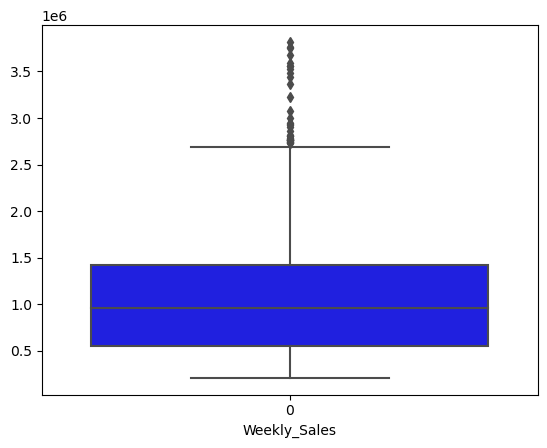

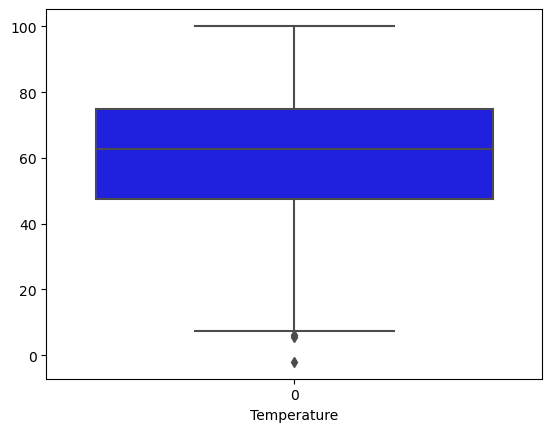

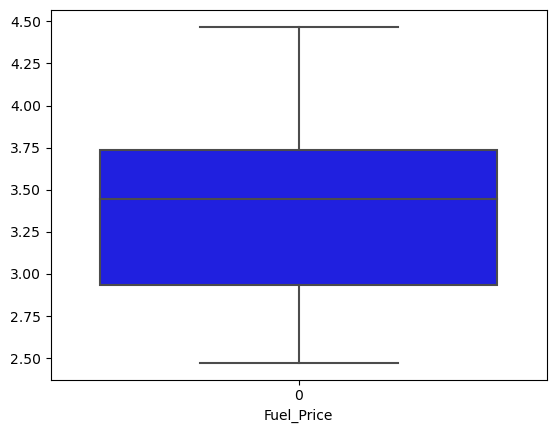

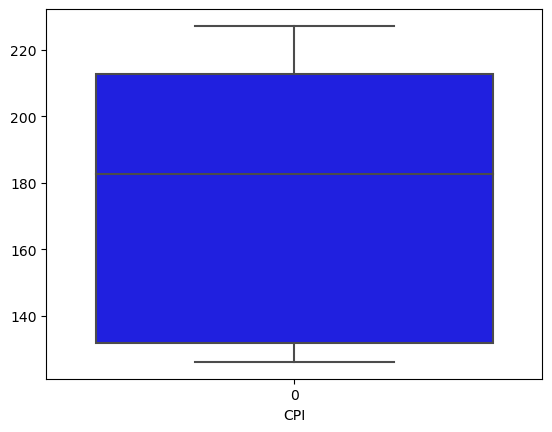

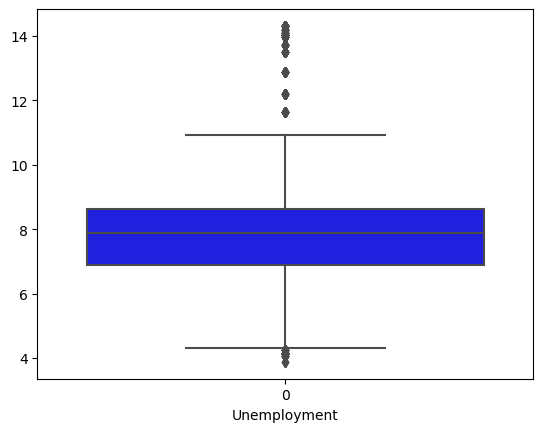

In [13]:
# lets check out the outliers 
col=['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
for i in col :
    sns.boxplot(data_main_1[i],color='blue')
    plt.xlabel(i)
    plt.show()
    

In [14]:
col=['Weekly_Sales','Temperature','Unemployment']
for i in col :
    q1=data_main_1[i].quantile(0.25)
    q3=data_main_1[i].quantile(0.75)
    iqr=q3-q3
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    data_main_1=data_main_1[(data_main_1[i]>=ll) & (data_main_1[i]<=ul)]

In [15]:
data_main_1.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3       1 2010-02-26    1409727.59             0        46.63       2.561   
7       1 2010-03-26    1404429.92             0        51.45       2.732   
11      1 2010-04-23    1391256.12             0        64.84       2.795   
37      1 2010-10-22    1345454.00             0        69.86       2.725   
38      1 2010-10-29    1384209.22             0        69.64       2.716   

           CPI  Unemployment  Year  Month  Day  
3   211.319643         8.106  2010      2   26  
7   211.018042         8.106  2010      3   26  
11  210.439123         7.808  2010      4   23  
37  211.861294         7.838  2010     10   22  
38  211.908844         7.838  2010     10   29

In [16]:
data_main_1.shape

(805, 11)

EDA

In [17]:
data_main.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment         Year        Month          Day  
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151  2010.965035     6.475524    15.650350  
std      39.356712      1.875885     0.797019     3.321797     8.753908  
min     126.064000      3.879000  2010.000000     1.000000     1.000000  
25%     131.735000      6.891000  2010.000000     4.000000     8.000000  
50%     182.616521      7.874000  2011.000000     6.000000    16.000000  
75%     212.743293      8.622000  2012.000000     9.000000    23.000000  
max     227.232807     14.313000  2012.000000    12.000000    31.000000

In [18]:
data_main_1.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
count  805.000000  8.050000e+02    805.000000   805.000000  805.000000   
mean    26.036025  9.743819e+05      0.044720    59.090733    3.454538   
std     10.212418  2.691971e+05      0.206818     7.856739    0.490040   
min      1.000000  5.539020e+05      0.000000    45.160000    2.561000   
25%     21.000000  7.187806e+05      0.000000    51.960000    2.942000   
50%     25.000000  9.867650e+05      0.000000    59.350000    3.583000   
75%     32.000000  1.223356e+06      0.000000    65.740000    3.882000   
max     45.000000  1.418974e+06      1.000000    71.930000    4.288000   

              CPI  Unemployment         Year       Month         Day  
count  805.000000    805.000000   805.000000  805.000000  805.000000  
mean   171.322177      8.008540  2010.983851    6.606211   16.534161  
std     35.265507      0.480022     0.784481    3.185041    8.333257  
min    127.300935      7.057000  2010.000000    1.000000    1.000000  
25%    136.515097      7.564000  2010.000000    4.000000   10.000000  
50%    182.855869      8.090000  2011.000000    6.000000   17.000000  
75%    209.980321      8.445000  2012.000000    9.000000   23.000000  
max    223.009084      8.818000  2012.000000   12.000000   31.000000

In [19]:
#max and Min date for our both data
print("Max date is {} and Min date is {} for with outlier data ".format(data_main['Date'].max(),data_main['Date'].min()))
print("Max date is {} and Min date is {} for without outlier data ".format(data_main_1['Date'].max(),data_main_1['Date'].min()))

Max date is 2012-12-10 00:00:00 and Min date is 2010-01-10 00:00:00 for with outlier data 
Max date is 2012-12-10 00:00:00 and Min date is 2010-01-10 00:00:00 for without outlier data 


In [20]:
#now let us check the correlation of weekly with the other fixure
col=['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']
for i in col :
    trace=go.Scatter(x=data_main['Weekly_Sales'],y=data_main[i],mode='markers',marker=dict(color='orange',size=10))
    layout=go.Layout(xaxis=dict(title='Weekly_Sales'),
                     yaxis=dict(title=i),
                     title='Scatter plot to see correlation with Weekly_Sales'
                     )
    fig=go.Figure(data=[trace],layout=layout)
    fig.show()

In [21]:
# Calculate the correlation coefficient between weekly sales with the columns
col=['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']
for i in col : 
  correlation_coefficient = data_main['Weekly_Sales'].corr(data_main[i]) 
  print("Correlation Coefficient Between Weekly Sales and {} is {}".format(i,correlation_coefficient))

Correlation Coefficient Between Weekly Sales and Holiday_Flag is 0.03689096801041456
Correlation Coefficient Between Weekly Sales and Temperature is -0.0638100131794696
Correlation Coefficient Between Weekly Sales and Fuel_Price is 0.009463786314475123
Correlation Coefficient Between Weekly Sales and CPI is -0.07263416204017631
Correlation Coefficient Between Weekly Sales and Unemployment is -0.10617608965795419


So,As we can see in the graph and the above calculation, we can not find any regit correaltion between weekly sales and other columns.

In [22]:
# now gonna do it for without outlier data
col=['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']
for i in col :
    trace=go.Scatter(x=data_main_1['Weekly_Sales'],y=data_main_1[i],mode='markers',marker=dict(color='orange',size=10))
    layout=go.Layout(xaxis=dict(title='Weekly_Sales'),
                     yaxis=dict(title=i),
                     title='Scatter plot to see correlation with Weekly_Sales'
                     )
    fig=go.Figure(data=[trace],layout=layout)
    fig.show()

In [23]:
# Calculate the correlation coefficient between weekly sales with the columns
col=['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']
for i in col : 
  correlation_coefficient = data_main['Weekly_Sales'].corr(data_main_1[i]) 
  print("Correlation Coefficient Between Weekly Sales and {} is {}".format(i,correlation_coefficient))

Correlation Coefficient Between Weekly Sales and Holiday_Flag is -0.046018860589813346
Correlation Coefficient Between Weekly Sales and Temperature is 0.003338172379303357
Correlation Coefficient Between Weekly Sales and Fuel_Price is -0.14548483627542855
Correlation Coefficient Between Weekly Sales and CPI is 0.022460885497055154
Correlation Coefficient Between Weekly Sales and Unemployment is 0.005536761345620019


For this data also we cant find any direct correlation between them

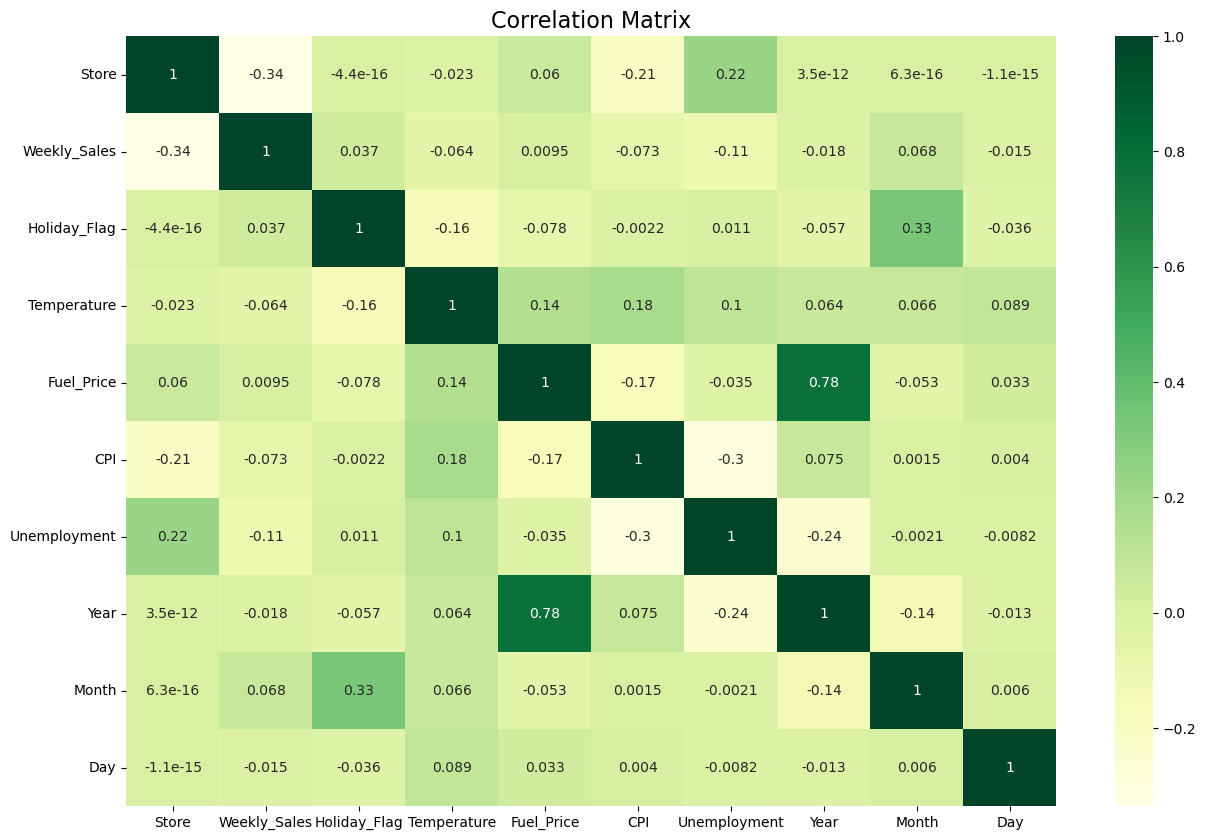

In [24]:
# lets check this out with correlation matrix for both data
plt.figure(figsize=(15,10))
sns.heatmap(data_main.corr(),annot=True,cmap='YlGn')
plt.title('Correlation Matrix',fontsize=16)
plt.show()

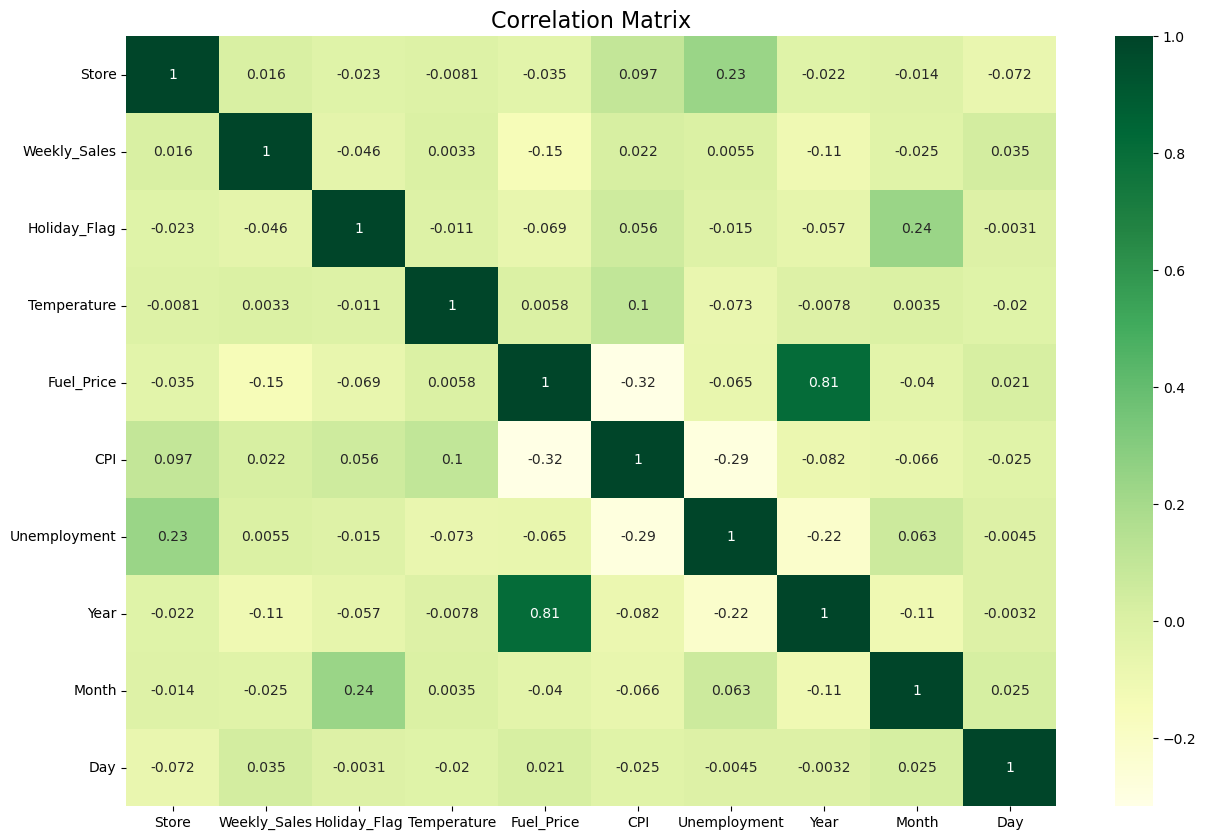

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(data_main_1.corr(),annot=True,cmap='YlGn')
plt.title('Correlation Matrix',fontsize=16)
plt.show()

We can also obseve in the correlation matrix there is no such corrlinearity persent.

In [26]:
# lets chack distribution of weekly_sales for both data
# Create a figure with the histogram and KDE line


In [27]:
# Create the histogram trace
histogram_trace = go.Histogram(x=data_main['Weekly_Sales'], nbinsx=30, marker=dict(color='blue'))

# Create a layout
layout = go.Layout(title='Histogram Plot',
                   xaxis=dict(title='Weekly_Sales'),
                   yaxis=dict(title='Frequency'))

# Create a figure with the histogram trace and layout
fig = go.Figure(data=[histogram_trace], layout=layout)

# Display the figure
fig.show()

From the above graph of destribution we can say that this destribution is right slewed sitribution.and Log normal distibution may present.

In [28]:
# Create the histogram trace
histogram_trace = go.Histogram(x=data_main_1['Weekly_Sales'], nbinsx=30, marker=dict(color='blue'))

# Create a layout
layout = go.Layout(title='Histogram Plot',
                   xaxis=dict(title='Weekly_Sales'),
                   yaxis=dict(title='Frequency'))

# Create a figure with the histogram trace and layout
fig = go.Figure(data=[histogram_trace], layout=layout)

# Display the figure
fig.show()

this graph of distribution is showing thre are two picks probably indicating to words the binomial distribution

Now, We gonna try to compute some insights for some of the stores and try to build model on it.
we are going to take store no. 8,15,27,38 these 4 stores from total 45 stores.

Also we create some functions so that just passingthe store number and more features the store owner can see the progress og the store

In [29]:
def get_weekly_sales_of_store(store,week_date) :
   df=data_main[data_main['Store']==store][data_main['Date']==week_date].groupby('Store')['Weekly_Sales'].sum().reset_index()
   return df

In [30]:
get_weekly_sales_of_store(8,'2012-12-10')

Store  Weekly_Sales
0      8     927511.99

In [31]:
get_weekly_sales_of_store(15,'2012-12-10')

Store  Weekly_Sales
0     15     551799.63

In [32]:
get_weekly_sales_of_store(27,'2012-12-10')

Store  Weekly_Sales
0     27    1660081.29

In [33]:
get_weekly_sales_of_store(38,'2012-12-10').iloc[:,1]

0    437320.66
Name: Weekly_Sales, dtype: float64

So, from above function you can get weekly sales of particular store on specific week

In [34]:
def get_data_stores_on_week(wee_date) :
    df=data_main[data_main['Date']==wee_date]
    return df 
    

In [35]:
get_data_stores_on_week('12-02-2010').head()


Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1        1 2010-12-02    1641957.44             1        38.51       2.548   
144      2 2010-12-02    2137809.50             1        38.49       2.548   
287      3 2010-12-02     420728.96             1        47.93       2.548   
430      4 2010-12-02    2188307.39             1        28.84       2.573   
573      5 2010-12-02     311825.70             1        39.81       2.548   

            CPI  Unemployment  Year  Month  Day  
1    211.242170         8.106  2010     12    2  
144  210.897994         8.324  2010     12    2  
287  214.574792         7.368  2010     12    2  
430  126.496258         8.623  2010     12    2  
573  211.800470         6.566  2010     12    2

So, by using above function you can get a data for specific week.

In [36]:
def get_top10_store_data_for_week(week_date) :
    df=data_main[data_main['Date']==week_date].sort_values(by='Weekly_Sales',ascending=False).iloc[:10]
    return df


In [37]:
get_top10_store_data_for_week('05-03-2010')

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1863     14 2010-05-03    2237544.75             0        37.13       2.777   
2721     20 2010-05-03    2119213.72             0        31.75       2.777   
147       2 2010-05-03    1991013.13             0        47.17       2.625   
1291     10 2010-05-03    1987090.09             0        55.92       2.877   
433       4 2010-05-03    1971057.44             0        43.49       2.654   
1720     13 2010-05-03    1939980.43             0        40.65       2.681   
3865     28 2010-05-03    1608435.45             0        53.77       2.987   
719       6 2010-05-03    1601348.82             0        49.63       2.625   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
2578     19 2010-05-03    1495844.57             0        32.92       2.919   

             CPI  Unemployment  Year  Month  Day  
1863  182.120157         8.992  2010      5    3  
2721  204.494073         8.187  2010      5    3  
147   211.006754         8.324  2010      5    3  
1291  126.578286         9.765  2010      5    3  
433   126.578286         8.623  2010      5    3  
1720  126.578286         8.316  2010      5    3  
3865  126.578286        13.975  2010      5    3  
719   212.874519         7.259  2010      5    3  
4     211.350143         8.106  2010      5    3  
2578  131.735000         8.350  2010      5    3

So,for week '05-03-2010' top 10 stores are 14,20,2,10,4,13,28,6,1,19. 

In [38]:
def get_bottum10_store_data_for_week(week_date) :
    df=data_main[data_main['Date']==week_date].sort_values(by='Weekly_Sales',ascending=True).iloc[:10]
    return df

In [39]:
get_bottum10_store_data_for_week('05-03-2010')

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6153     44 2010-05-03     284617.27             0        40.65       2.681   
576       5 2010-05-03     288855.71             0        48.89       2.625   
4580     33 2010-05-03     291484.89             0        59.17       2.877   
5295     38 2010-05-03     372239.89             0        53.77       2.987   
290       3 2010-05-03     415202.04             0        53.04       2.625   
2149     16 2010-05-03     444181.85             0        27.92       2.620   
4151     30 2010-05-03     472591.07             0        48.61       2.625   
5009     36 2010-05-03     480203.43             0        51.33       2.574   
862       7 2010-05-03     491419.55             0        35.86       2.620   
1148      9 2010-05-03     507297.88             0        48.43       2.625   

             CPI  Unemployment  Year  Month  Day  
6153  126.578286         8.119  2010      5    3  
576   211.907165         6.566  2010      5    3  
4580  126.578286        10.115  2010      5    3  
5295  126.578286        13.975  2010      5    3  
290   214.675139         7.368  2010      5    3  
2149  189.669505         7.039  2010      5    3  
4151  211.006754         8.324  2010      5    3  
5009  210.109275         8.554  2010      5    3  
862   189.669505         9.014  2010      5    3  
1148  214.905472         6.415  2010      5    3

bottum 10 stores on week '05-03-2010' are 44,5,33,38,3,16,30,7,9.

In [40]:
def get_data_by_holiday_flag(holiday_flag):
    if (data_main['Holiday_Flag'] == holiday_flag).any():
        df = data_main.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values(by="Weekly_Sales", ascending=False)
        return df
    else:
        return None


In [41]:
"""def get_data_holiday_week(week_date) :
    if ((data_main['Date']==week_date) & (data_main['Holiday_Flag']==0)).any() : 
        print('There is no Holiday in given week')
    else :
        print("Yes holiday is present")    
    df=data_main[data_main['Date']==week_date]
    df1=df.drop(columns=['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Year','Month','Day'])
    return df1   """

'def get_data_holiday_week(week_date) :\n    if ((data_main[\'Date\']==week_date) & (data_main[\'Holiday_Flag\']==0)).any() : \n        print(\'There is no Holiday in given week\')\n    else :\n        print("Yes holiday is present")    \n    df=data_main[data_main[\'Date\']==week_date]\n    df1=df.drop(columns=[\'Holiday_Flag\',\'Temperature\',\'Fuel_Price\',\'CPI\',\'Unemployment\',\'Year\',\'Month\',\'Day\'])\n    return df1   '

In [42]:
get_data_by_holiday_flag(0).head(5)

Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08

Note that for above function applying .head(10) and .tail(10) you can retrive top 10 and bottum 10 performing store on holiday week.

In [43]:
get_data_by_holiday_flag(1).head(5)

Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08

Note that for above function applying .head(10) and .tail(10) you can retrive top 10 and bottum 10 performing store on no holiday week.

In [44]:
# Create a bar plot trace
bar_trace = go.Bar(x=get_data_by_holiday_flag(0)['Store'], y=get_data_by_holiday_flag(0)['Weekly_Sales'],name='Barplot', marker=dict(color='orange'))

# Create a layout
layout = go.Layout(title='Bar Plot',
                   xaxis=dict(title='Stores'),
                   yaxis=dict(title='Weekly_Sales_on_Holyday_week'))

# Create a figure with both traces and layout
fig = go.Figure(data=[bar_trace], layout=layout)

# Display the figure
fig.show()

In [45]:


# Create a bar plot trace
bar_trace = go.Bar(x=get_data_by_holiday_flag(1)['Store'], y=get_data_by_holiday_flag(1)['Weekly_Sales'],name='Barplot', marker=dict(color='orange'))

# Create a layout
layout = go.Layout(title='Bar Plot',
                   xaxis=dict(title='Stores'),
                   yaxis=dict(title='Weekly_Sales_on_Holyday_week'))

# Create a figure with both traces and layout
fig = go.Figure(data=[bar_trace], layout=layout)

# Display the figure
fig.show()

This shows the performance of each stores on the week having Holiday.



In [338]:
from scipy import stats
# Generate two sets of sample data
sample1 = get_data_by_holiday_flag(1)['Weekly_Sales']# Example sample 1 data
sample2 = get_data_by_holiday_flag(0)['Weekly_Sales']  # Example sample 2 data

# Perform independent samples t-test
# Null hypothesis: The means of the two samples are equal
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

# Check the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. Means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis. Means of the two samples are not significantly different.")


Fail to reject the null hypothesis. Means of the two samples are not significantly different.


In [46]:
def get_data_for_store(store) :
   return data_main[data_main['Store']==store].groupby('Date')['Weekly_Sales'].sum().reset_index()


In [47]:
data_store_8=get_data_for_store(8)
data_store_15=get_data_for_store(15)
data_store_27=get_data_for_store(27)
data_store_38=get_data_for_store(38)

We will use this data for time series.

In [48]:
def get_full_data_for_store(store) :
   return data_main[data_main['Store']==store]

In [336]:
# now there can be impact of temperature on the weekly sales and it can help to store the inventry
for i in range(1,46)  :
   d=get_full_data_for_store(i)[['Temperature','Weekly_Sales']]
   bins = [20,30, 40,50, 60,70,110]
   labels = ['20-30', '30-40', '40-50', '50-60','60-70', '70-110']
   d['Temperature_range'] = pd.cut(d['Temperature'], bins=bins, labels=labels, include_lowest=True)
   e=d.groupby('Temperature_range')['Weekly_Sales'].sum().reset_index()
   # Create a bar plot trace
   bar_trace = go.Bar(x=e['Temperature_range'], y=e['Weekly_Sales'],name='Barplot', marker=dict(color='orange'))

# Create a layout
   title='Bar Plot of store '+str(i)
   layout = go.Layout(title=title,
                   xaxis=dict(title='Temperature_range'),
                   yaxis=dict(title='Weekly_Sales'))

# Create a figure with both traces and layout
   fig = go.Figure(data=[bar_trace], layout=layout)

# Display the figure
   fig.show()
   fig.write_image(f"store_{i}_bar_plot.png")

In [328]:
bins = [20,30, 40,50, 60,70,110]
labels = ['20-30', '30-40', '40-50', '50-60','60-70', '70-110']
d['Temperature_range'] = pd.cut(d['Temperature'], bins=bins, labels=labels, include_lowest=True)


In [329]:
d.groupby('Temperature_range')['Weekly_Sales'].sum().reset_index()

Temperature_range  Weekly_Sales
0             20-30  0.000000e+00
1             30-40  6.294554e+06
2             40-50  3.057663e+07
3             50-60  3.034395e+07
4             60-70  5.136375e+07
5            70-110  1.038239e+08

In [330]:


# Create a bar plot trace
bar_trace = go.Bar(x=d.groupby('Temperature_range')['Weekly_Sales'].sum().reset_index()['Temperature_range'], y=d.groupby('Temperature_range')['Weekly_Sales'].sum().reset_index()['Weekly_Sales'],name='Barplot', marker=dict(color='orange'))

# Create a layout
layout = go.Layout(title='Bar Plot',
                   xaxis=dict(title='Stores'),
                   yaxis=dict(title='Weekly_Sales_on_Holyday_week'))

# Create a figure with both traces and layout
fig = go.Figure(data=[bar_trace], layout=layout)

# Display the figure
fig.show()

In [49]:
data_8wo=get_full_data_for_store(8)
data_15wo=get_full_data_for_store(15)
data_27wo=get_full_data_for_store(27)
data_38wo=get_full_data_for_store(38)

Above data is with outliers.

In [50]:
#also recall our data_Main_data
def get_full_data_noo_for_store(store) :
    return  data_main_1[data_main_1['Store']==store]

In [51]:
get_full_data_noo_for_store(38)

Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day]
Index: []

Note that by droping too much outliers we cant get data fro some of stores, So we will drop only outliers for weekly sales features.

In [52]:
data_main_1=data_main.copy()

In [53]:
q1=data_main_1['Weekly_Sales'].quantile(0.25)
q3=data_main_1['Weekly_Sales'].quantile(0.75)
iqr=q3-q3
ul=q3+1.5*iqr
ll=q1-1.5*iqr
data_main_1=data_main_1[(data_main_1['Weekly_Sales']>=ll) & (data_main_1['Weekly_Sales']<=ul)]

In [54]:
data_main_1.shape

(3217, 11)

In [55]:
# now try to get data for specific stores
get_full_data_noo_for_store(8)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1001      8 2010-05-02    1004137.09             0        34.14       2.572   
1002      8 2010-12-02     994801.40             1        33.34       2.548   
1003      8 2010-02-19     963960.37             0        39.10       2.514   
1004      8 2010-02-26     847592.11             0        37.91       2.561   
1005      8 2010-05-03     881503.95             0        45.64       2.625   
...     ...        ...           ...           ...          ...         ...   
1139      8 2012-09-28     884724.41             0        71.10       3.666   
1140      8 2012-05-10     976436.02             0        61.41       3.617   
1141      8 2012-12-10     927511.99             0        55.03       3.601   
1142      8 2012-10-19     900309.75             0        62.99       3.594   
1143      8 2012-10-26     891671.44             0        64.74       3.506   

             CPI  Unemployment  Year  Month  Day  
1001  214.471451         6.299  2010      5    2  
1002  214.621419         6.299  2010     12    2  
1003  214.666488         6.299  2010      2   19  
1004  214.694074         6.299  2010      2   26  
1005  214.721659         6.299  2010      5    3  
...          ...           ...   ...    ...  ...  
1139  226.567571         5.401  2012      9   28  
1140  226.770558         5.124  2012      5   10  
1141  226.973545         5.124  2012     12   10  
1142  227.018417         5.124  2012     10   19  
1143  227.036936         5.124  2012     10   26  

[141 rows x 11 columns]

Still getting too less data to train our models for the stores so we drop our idea that try to build model without outliers

<Axes: >

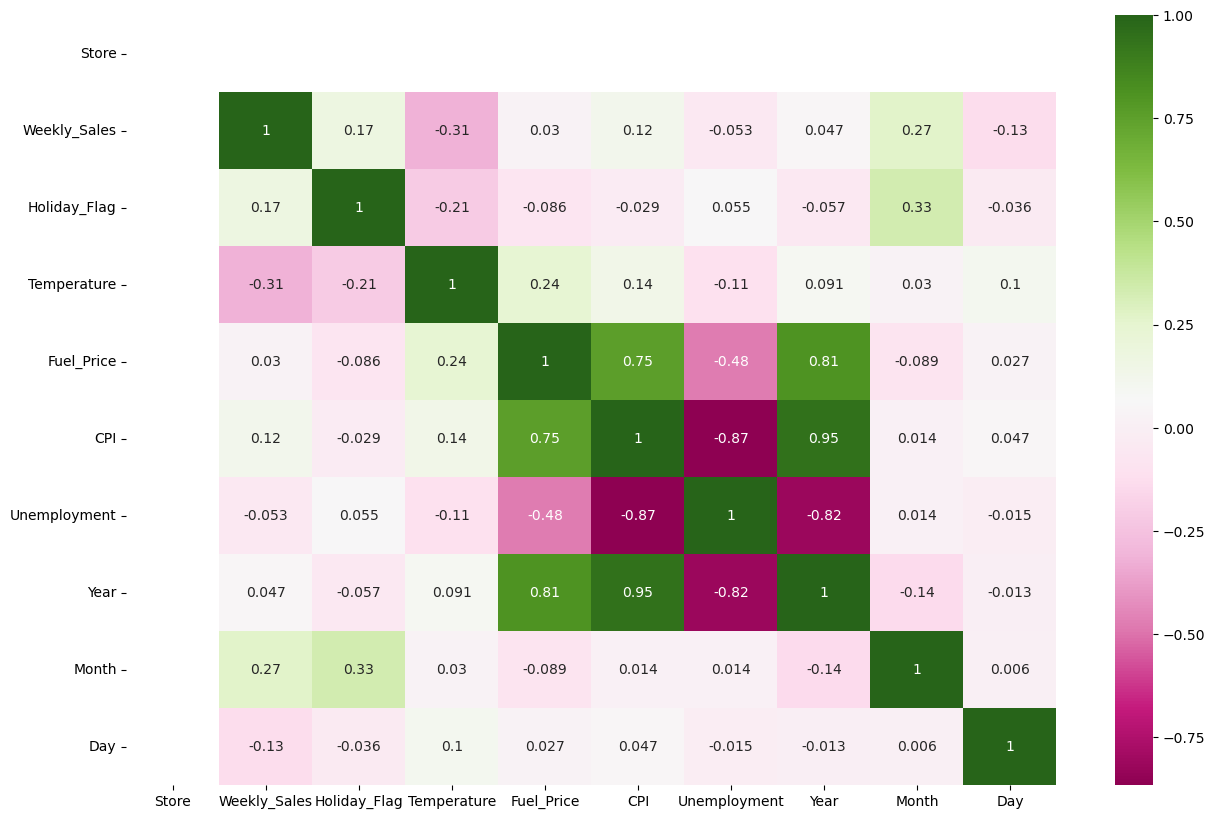

In [56]:
# correlation matrix for data of store 8
plt.figure(figsize=(15,10))
sns.heatmap(data_8wo.corr(),cmap='PiYG',annot=True)

So, for store 8 there is no strong correlation between weekly sales and other columns, but threre arre sum columns for which multicolinearity may present.

<Axes: >

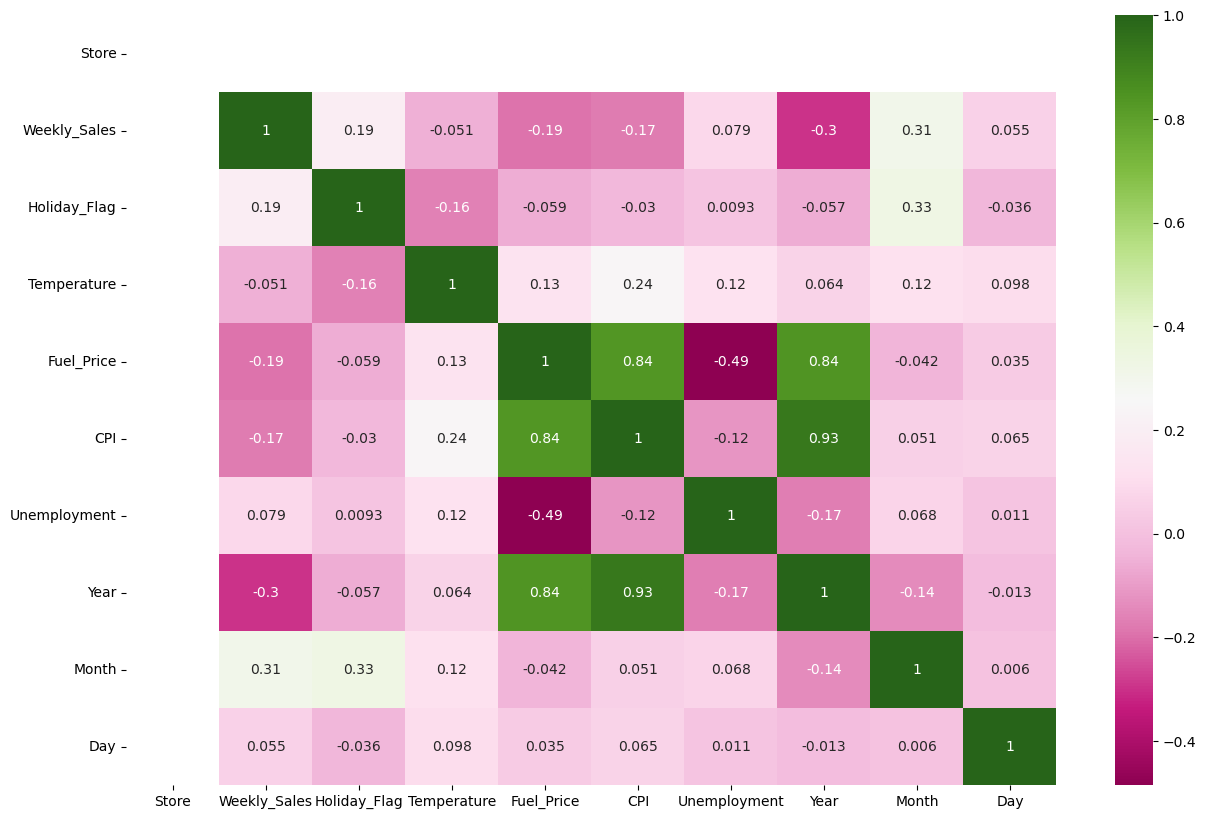

In [57]:
# correlation matrix for data of store 15
plt.figure(figsize=(15,10))
sns.heatmap(data_15wo.corr(),cmap='PiYG',annot=True)

Same,for store 15 there is no strong correlation between weekly sales and other columns, but threre arre sum columns for which multicolinearity may present.

<Axes: >

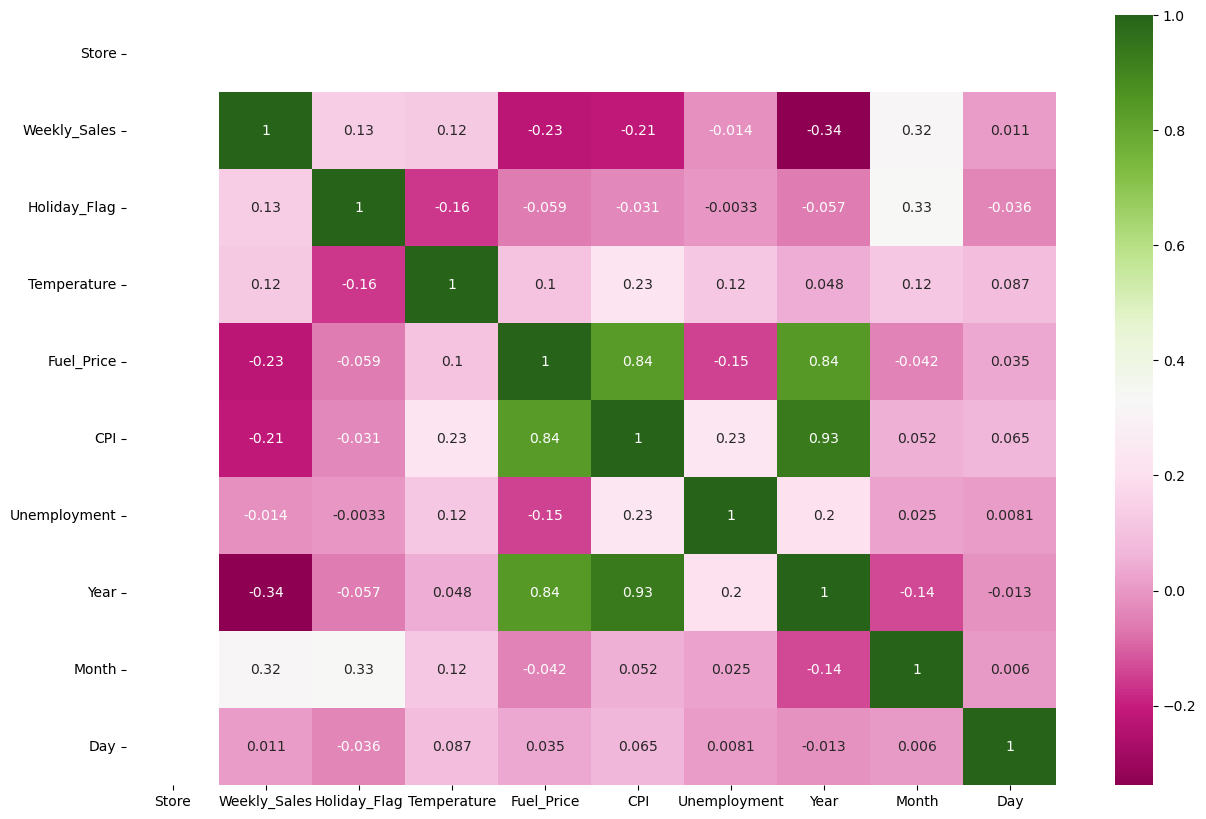

In [58]:
# correlation matrix for data of store 27
plt.figure(figsize=(15,10))
sns.heatmap(data_27wo.corr(),cmap='PiYG',annot=True)

<Axes: >

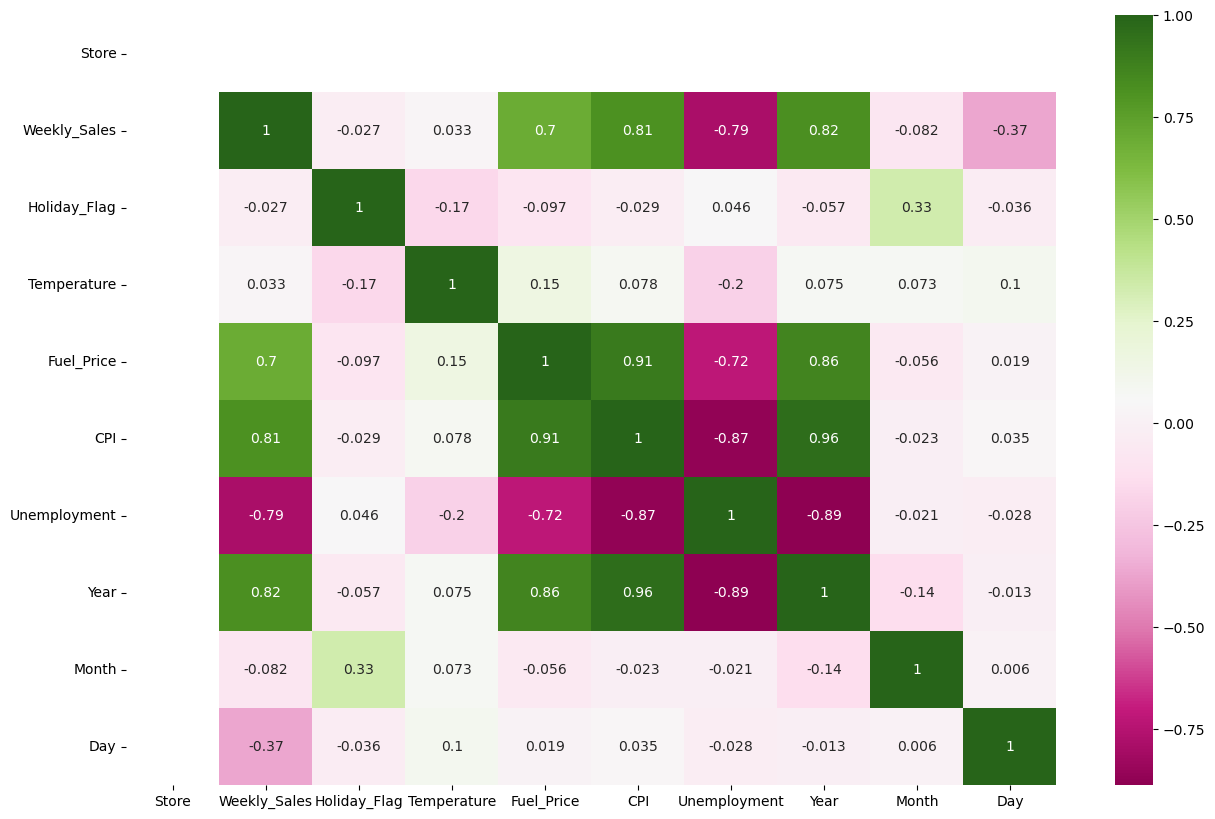

In [59]:
# correlation matrix for data of store 38
plt.figure(figsize=(15,10))
sns.heatmap(data_38wo.corr(),cmap='PiYG',annot=True)

So, For store 38 weekly Sales having corralation +ve manner with fuel_price,cpi,and year also -Ve correlation with unemployment.

In [60]:
#let's do analysis for store 38 as it hase correlation 
col=['Year','Fuel_Price','CPI','Unemployment']
for i in col :
    trace=go.Scatter(x=data_38wo['Weekly_Sales'],y=data_38wo[i],mode='markers',marker=dict(color='orange',size=10))
    layout=go.Layout(xaxis=dict(title='Weekly_Sales'),
                     yaxis=dict(title=i),
                     title='Scatter plot to see correlation with Weekly_Sales'
                     )
    fig=go.Figure(data=[trace],layout=layout)
    fig.show()

In [61]:
col=['Year','Fuel_Price','CPI','Unemployment']
for i in col :
   dff=data_38wo[data_38wo[i]<data_38wo[i].mean()]
   print('Avrage Weekly Sales for store 38 when {} is less than avg {} is {}'.format(i,i,dff['Weekly_Sales'].mean()))
   dff1=data_38wo[data_38wo[i]>data_38wo[i].mean()]
   print('Avrage Weekly Sales for store 38 when {} is greater than avg {} is {}'.format(i,i,dff1['Weekly_Sales'].mean()))    

Avrage Weekly Sales for store 38 when Year is less than avg Year is 345579.0525
Avrage Weekly Sales for store 38 when Year is greater than avg Year is 406019.2831578946
Avrage Weekly Sales for store 38 when Fuel_Price is less than avg Fuel_Price is 352882.30250000005
Avrage Weekly Sales for store 38 when Fuel_Price is greater than avg Fuel_Price is 409478.1719277109
Avrage Weekly Sales for store 38 when CPI is less than avg CPI is 349868.57550000004
Avrage Weekly Sales for store 38 when CPI is greater than avg CPI is 411656.76975903613
Avrage Weekly Sales for store 38 when Unemployment is less than avg Unemployment is 426953.5180357142
Avrage Weekly Sales for store 38 when Unemployment is greater than avg Unemployment is 359198.0391954023


Now We move forward to build the model

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [63]:
data_store_8.head()

Date  Weekly_Sales
0 2010-01-10     804105.49
1 2010-02-04     914500.91
2 2010-02-07     852333.75
3 2010-02-19     963960.37
4 2010-02-26     847592.11

In [64]:
data_store_8.set_index(data_store_8['Date'],inplace=True)

In [65]:
data_store_8.head()

Date  Weekly_Sales
Date                               
2010-01-10 2010-01-10     804105.49
2010-02-04 2010-02-04     914500.91
2010-02-07 2010-02-07     852333.75
2010-02-19 2010-02-19     963960.37
2010-02-26 2010-02-26     847592.11

In [66]:
del data_store_8['Date']

<Axes: xlabel='Date'>

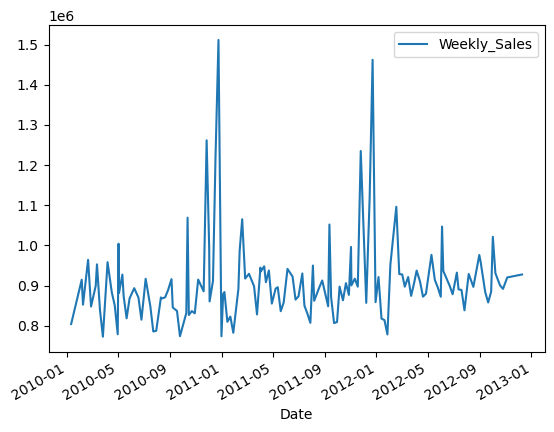

In [67]:
data_store_8.plot()

We can observe stationarity for store 8, we will verify it.

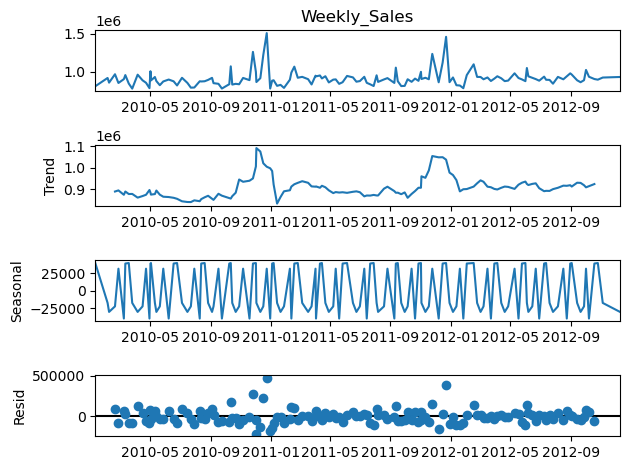

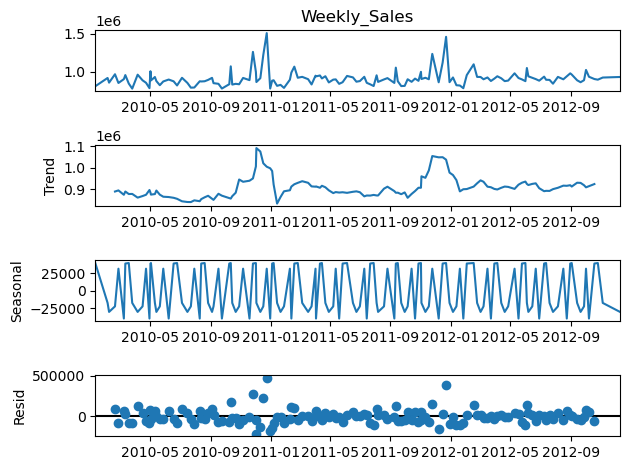

In [68]:
decompose_result = seasonal_decompose(data_store_8['Weekly_Sales'],period=7)

decompose_result.plot()

In [69]:
mean_log = data_store_8.rolling(window=12).mean()

Text(0.5, 1.0, 'Rolling Mean ')

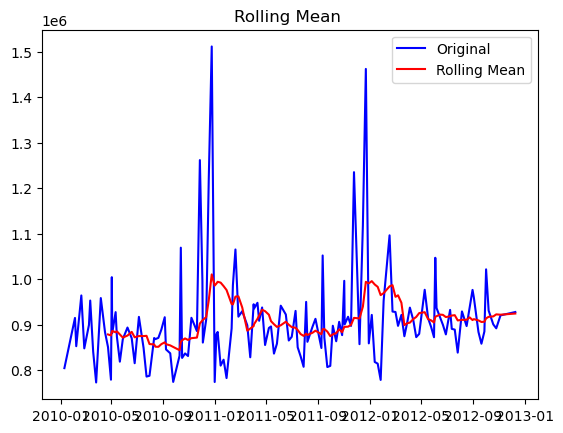

In [70]:
plt.plot(data_store_8, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean ')

Before building a time series model, we need to make sure that the time series is stationary. If the time series is non-stationary, then we need to make it stationary by differencing the data. The number of times we take a difference of the data is a parameter used in ARIMA models, which we will see shortly.

Non-stationarity in time series may appear for the following reasons:

Presence of a trend in the data
Presence of heteroskedasticity
Presence of autocorrelation
We can identify non-stationarity in the time series by performing a statistical test called the Augmented Dicky-Fuller Test.

Null Hypothesis: The time series is non stationary
Alternate Hypothesis: The time series is stationary

In [71]:
#if p_value is less than 0.05 then the series is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_store_8['Weekly_Sales'])
print(result[1])

4.122113430577634e-17


So, The P-value is less than 0.05. We reject the null hypothisis that this series is not stationary that is this saries is stationary.

In [72]:
data_store_8.shape

(143, 1)

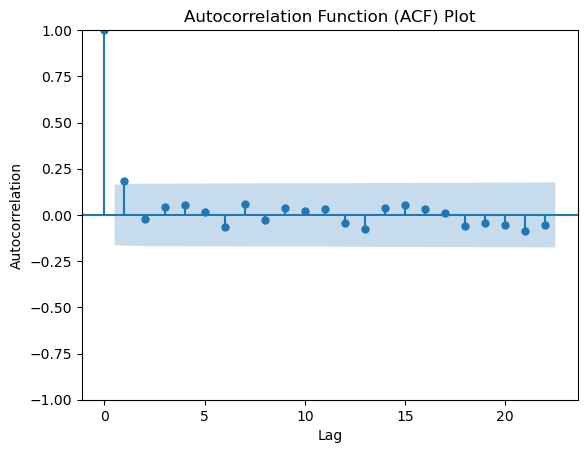

In [73]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF of the time series data
plot_acf(data_store_8)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()


As we can see our q value will be 1. 

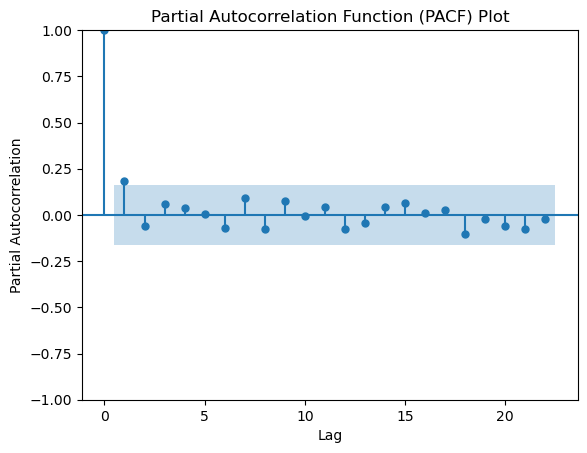

In [74]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF of the time series data
plot_pacf(data_store_8)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()


As we can see our q value will be 1. 

In [75]:
train = data_store_8.iloc[:142]['Weekly_Sales']
model = ARIMA(train, order=(1,0,1)) 
model_fit = model.fit()

c:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [76]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  142
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1842.181
Date:                Tue, 16 Apr 2024   AIC                           3692.362
Time:                        23:51:45   BIC                           3704.185
Sample:                             0   HQIC                          3697.167
                                - 142                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.086e+05   1.21e+04     75.268      0.000    8.85e+05    9.32e+05
ar.L1         -0.2381      0.275     -0.865      0.387      -0.777       0.301
ma.L1          0.4328      0.252      1.718      0.086      -0.061       0.927
sigma2      1.102e+10      0.126   8.74e+10      0.000     1.1e+10     1.1e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               611.06
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             2.46
Prob(H) (two-sided):                  0.42   Kurtosis:                        11.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.32e+25. Standard errors may be unstable.
"""

In [77]:
data_store_8['predict'] = model_fit.predict(start=142 ,
                                    end=len(train)+12,
                                    dynamic=True)
data_store_8[['Weekly_Sales','predict']]

c:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Weekly_Sales  predict
Date                             
2010-01-10     804105.49      NaN
2010-02-04     914500.91      NaN
2010-02-07     852333.75      NaN
2010-02-19     963960.37      NaN
2010-02-26     847592.11      NaN
...                  ...      ...
2012-10-08     930745.69      NaN
2012-10-19     900309.75      NaN
2012-10-26     891671.44      NaN
2012-11-05     920128.89      NaN
2012-12-10     927511.99      NaN

[143 rows x 2 columns]

<Axes: xlabel='Date'>

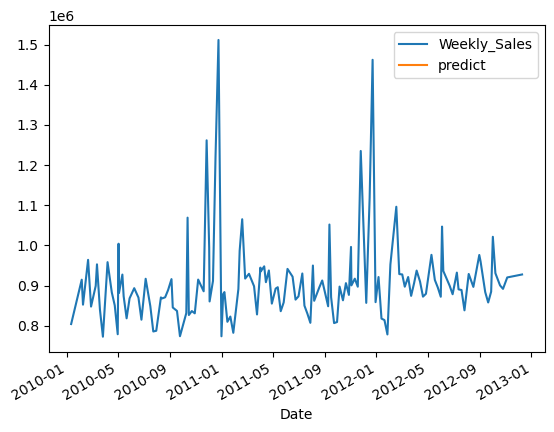

In [78]:
data_store_8[['Weekly_Sales','predict']].plot()

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,1), seasonal_order=(1,0,1,7))
model = model.fit()

c:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



c:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



<Axes: xlabel='Date'>

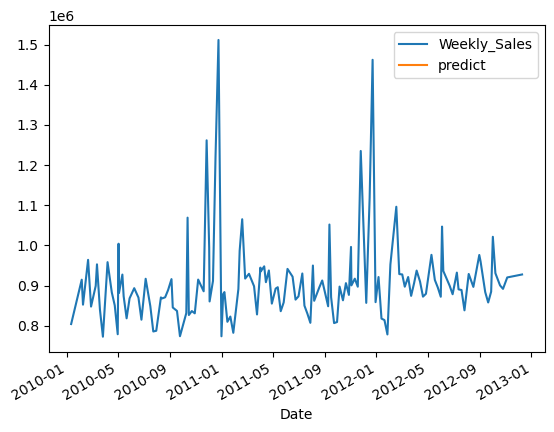

In [80]:
data_store_8['predict'] = model.predict(start=142,
                                                       end=len(train)+12,
                                                       dynamic=True)
data_store_8[['Weekly_Sales','predict']].plot()

c:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



<Axes: >

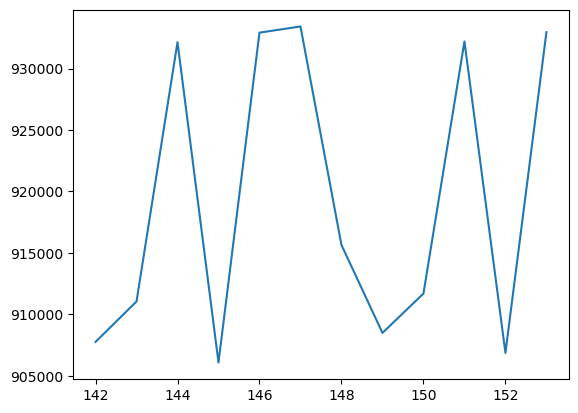

In [81]:
#forcasting for next 12 weeks
forecast = model.forecast(steps=12)
#data_store_8.plot()
forecast.plot()

Now let us do forcast for the 15,27 and 38 store number

In [82]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


In [83]:
from prophet import Prophet # importing a model
m=Prophet() # assigning a model

In [84]:
#before fitting our data we need to change the column names
data_store_15.columns=['ds','y']
data_store_15

ds          y
0   2010-01-10  566945.95
1   2010-02-04  718470.71
2   2010-02-07  709337.11
3   2010-02-19  660838.75
4   2010-02-26  564883.20
..         ...        ...
138 2012-10-08  590453.63
139 2012-10-19  555652.77
140 2012-10-26  558473.60
141 2012-11-05  579539.95
142 2012-12-10  551799.63

[143 rows x 2 columns]

In [85]:
data_store_27.columns=['ds','y']
data_store_27

ds           y
0   2010-01-10  1543532.83
1   2010-02-04  2053952.97
2   2010-02-07  2024554.10
3   2010-02-19  1945070.33
4   2010-02-26  1390934.27
..         ...         ...
138 2012-10-08  1720537.26
139 2012-10-19  1620374.24
140 2012-10-26  1703047.74
141 2012-11-05  1674306.31
142 2012-12-10  1660081.29

[143 rows x 2 columns]

In [86]:
data_store_38.columns=['ds','y']
data_store_38

ds          y
0   2010-01-10  360256.58
1   2010-02-04  368929.55
2   2010-02-07  361181.48
3   2010-02-19  327237.92
4   2010-02-26  334222.73
..         ...        ...
138 2012-10-08  436690.13
139 2012-10-19  428806.46
140 2012-10-26  417290.38
141 2012-11-05  429914.60
142 2012-12-10  437320.66

[143 rows x 2 columns]

In [87]:
m.fit(data_store_15)

23:52:06 - cmdstanpy - INFO - Chain [1] start processing


23:52:07 - cmdstanpy - INFO - Chain [1] done processing


In [88]:
# creating future dataframe for 10 days
future_data_store_15=m.make_future_dataframe(periods=12*7, freq='D')
future_data_store_15

ds
0   2010-01-10
1   2010-02-04
2   2010-02-07
3   2010-02-19
4   2010-02-26
..         ...
222 2013-02-28
223 2013-03-01
224 2013-03-02
225 2013-03-03
226 2013-03-04

[227 rows x 1 columns]

In [89]:
forecast_data_store_15=m.predict(future_data_store_15)

In [90]:
forecast_data_store_15

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0   2010-01-10  668163.445593  451928.680827  682086.094154  668163.445593   
1   2010-02-04  666171.029797  561893.254944  789465.510077  666171.029797   
2   2010-02-07  665931.939901  628510.778513  845695.433527  665931.939901   
3   2010-02-19  664975.580319  527915.478541  737949.528759  664975.580319   
4   2010-02-26  664417.703896  501815.540751  721014.260188  664417.703896   
..         ...            ...            ...            ...            ...   
222 2013-02-28  576910.756450  411979.419934  634305.939227  576910.755029   
223 2013-03-01  576831.059770  428342.812421  643980.068462  576831.058330   
224 2013-03-02  576751.363090  380912.762368  600356.748227  576751.361621   
225 2013-03-03  576671.666410  455708.463711  684940.812163  576671.664930   
226 2013-03-04  576591.969730  438077.985471  652760.453987  576591.968213   

       trend_upper  additive_terms  additive_terms_lower  \
0    668163.445593  -104491.372808        -104491.372808   
1    666171.029797    13537.875029          13537.875029   
2    665931.939901    67000.110023          67000.110023   
3    664975.580319   -28150.031057         -28150.031057   
4    664417.703896   -49726.914687         -49726.914687   
..             ...             ...                   ...   
222  576910.757915   -57847.848509         -57847.848509   
223  576831.061266   -42549.283099         -42549.283099   
224  576751.364625   -88316.622958         -88316.622958   
225  576671.667979    -8377.893578          -8377.893578   
226  576591.971349   -31253.331947         -31253.331947   

     additive_terms_upper        weekly  weekly_lower  weekly_upper  \
0          -104491.372808  30000.229017  30000.229017  30000.229017   
1            13537.875029  -8845.752791  -8845.752791  -8845.752791   
2            67000.110023  30000.229017  30000.229017  30000.229017   
3           -28150.031057   3382.791407   3382.791407   3382.791407   
4           -49726.914687   3382.791407   3382.791407   3382.791407   
..                    ...           ...           ...           ...   
222         -57847.848509  -8845.752791  -8845.752791  -8845.752791   
223         -42549.283099   3382.791407   3382.791407   3382.791407   
224         -88316.622958 -45987.036015 -45987.036015 -45987.036015   
225          -8377.893578  30000.229017  30000.229017  30000.229017   
226         -31253.331947   3014.002345   3014.002345   3014.002345   

            yearly   yearly_lower   yearly_upper  multiplicative_terms  \
0   -134491.601825 -134491.601825 -134491.601825                   0.0   
1     22383.627820   22383.627820   22383.627820                   0.0   
2     36999.881006   36999.881006   36999.881006                   0.0   
3    -31532.822464  -31532.822464  -31532.822464                   0.0   
4    -53109.706093  -53109.706093  -53109.706093                   0.0   
..             ...            ...            ...                   ...   
222  -49002.095719  -49002.095719  -49002.095719                   0.0   
223  -45932.074506  -45932.074506  -45932.074506                   0.0   
224  -42329.586943  -42329.586943  -42329.586943                   0.0   
225  -38378.122595  -38378.122595  -38378.122595                   0.0   
226  -34267.334292  -34267.334292  -34267.334292                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                           0.0                         0.0  563672.072785  
1                           0.0                         0.0  679708.904826  
2                           0.0                         0.0  732932.049924  
3                           0.0                         0.0  636825.549262  
4                           0.0                         0.0  614690.789209  
..                          ...                         ...            ...  
222                         0.0                         0.0  519062.90794

In [91]:
forecast_data_store_15[['ds','yhat','yhat_lower','yhat_upper']]

ds           yhat     yhat_lower     yhat_upper
0   2010-01-10  563672.072785  451928.680827  682086.094154
1   2010-02-04  679708.904826  561893.254944  789465.510077
2   2010-02-07  732932.049924  628510.778513  845695.433527
3   2010-02-19  636825.549262  527915.478541  737949.528759
4   2010-02-26  614690.789209  501815.540751  721014.260188
..         ...            ...            ...            ...
222 2013-02-28  519062.907940  411979.419934  634305.939227
223 2013-03-01  534281.776671  428342.812421  643980.068462
224 2013-03-02  488434.740132  380912.762368  600356.748227
225 2013-03-03  568293.772832  455708.463711  684940.812163
226 2013-03-04  545338.637783  438077.985471  652760.453987

[227 rows x 4 columns]

In [92]:
# ploting this forcasting
#Plot the original and forecasted time series using Plotly
fig = go.Figure()

# Plot the original time series
fig.add_trace(go.Scatter(x=data_store_15['ds'], y=data_store_15['y'], mode='lines', name='Original', line=dict(color='blue')))

# Plot the forecasted values
fig.add_trace(go.Scatter(x=forecast_data_store_15['ds'], y=forecast_data_store_15['yhat'], mode='lines', name='Forecast', line=dict(color='red')))

# Add upper and lower bounds of the forecast
fig.add_trace(go.Scatter(x=forecast_data_store_15['ds'], y=forecast_data_store_15['yhat_upper'], fill='tonexty', mode='none', name='Upper Bound', fillcolor='rgba(255,0,0,0.2)'))
fig.add_trace(go.Scatter(x=forecast_data_store_15['ds'], y=forecast_data_store_15['yhat_lower'], fill='tonexty', mode='none', name='Lower Bound', fillcolor='rgba(255,0,0,0.2)'))

# Customize layout
fig.update_layout(title='Forcasting sales for next 12 weeks of store no 15',
                  xaxis_title='Date',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()


In [93]:
m1=Prophet()
m1.fit(data_store_27)

23:52:08 - cmdstanpy - INFO - Chain [1] start processing


23:52:08 - cmdstanpy - INFO - Chain [1] done processing


In [94]:
future_data_store_27=m1.make_future_dataframe(periods=12*7, freq='D')

In [95]:
forecast_data_store_27=m1.predict(future_data_store_27)
forecast_data_store_27[['ds','yhat','yhat_lower','yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2010-01-10  1.698054e+06  1.466286e+06  1.913350e+06
1   2010-02-04  1.841837e+06  1.615576e+06  2.063178e+06
2   2010-02-07  1.942889e+06  1.710354e+06  2.185620e+06
3   2010-02-19  1.755114e+06  1.525693e+06  1.975152e+06
4   2010-02-26  1.749228e+06  1.521348e+06  1.966206e+06
..         ...           ...           ...           ...
222 2013-02-28  1.560471e+06  1.335349e+06  1.779955e+06
223 2013-03-01  1.563079e+06  1.334413e+06  1.788810e+06
224 2013-03-02  1.534852e+06  1.285360e+06  1.773745e+06
225 2013-03-03  1.668924e+06  1.451140e+06  1.892775e+06
226 2013-03-04  1.555237e+06  1.336381e+06  1.798802e+06

[227 rows x 4 columns]

In [96]:
fig = go.Figure()

# Plot the original time series
fig.add_trace(go.Scatter(x=data_store_27['ds'], y=data_store_27['y'], mode='lines', name='Original', line=dict(color='blue')))

# Plot the forecasted values
fig.add_trace(go.Scatter(x=forecast_data_store_27['ds'], y=forecast_data_store_27['yhat'], mode='lines', name='Forecast', line=dict(color='red')))

# Add upper and lower bounds of the forecast
fig.add_trace(go.Scatter(x=forecast_data_store_27['ds'], y=forecast_data_store_27['yhat_upper'], fill='tonexty', mode='none', name='Upper Bound', fillcolor='rgba(255,0,0,0.2)'))
fig.add_trace(go.Scatter(x=forecast_data_store_27['ds'], y=forecast_data_store_27['yhat_lower'], fill='tonexty', mode='none', name='Lower Bound', fillcolor='rgba(255,0,0,0.2)'))

# Customize layout
fig.update_layout(title='Forcasting sales for next 12 weeks of store no 27',
                  xaxis_title='Date',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()

In [97]:
m2=Prophet()
m2.fit(data_store_38)

23:52:09 - cmdstanpy - INFO - Chain [1] start processing


23:52:09 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
future_data_store_38=m2.make_future_dataframe(periods=12*7, freq='D')

In [99]:
forecast_data_store_38=m2.predict(future_data_store_38)
forecast_data_store_38[['ds','yhat','yhat_lower','yhat_upper']]

ds           yhat     yhat_lower     yhat_upper
0   2010-01-10  358907.519090  336936.782078  381553.307422
1   2010-02-04  366240.590507  344508.348206  389537.381733
2   2010-02-07  381873.890991  358941.452676  403601.049764
3   2010-02-19  335588.121652  312885.679355  358215.278569
4   2010-02-26  331341.176723  307233.285484  352443.910770
..         ...            ...            ...            ...
222 2013-02-28  484503.030938  462301.290638  506509.031922
223 2013-03-01  458919.569794  435738.440068  481030.713899
224 2013-03-02  478144.244349  456317.262151  500487.210432
225 2013-03-03  499188.196831  475632.150751  522720.327932
226 2013-03-04  500586.330703  479358.185612  524595.656969

[227 rows x 4 columns]

In [100]:
fig = go.Figure()

# Plot the original time series
fig.add_trace(go.Scatter(x=data_store_38['ds'], y=data_store_38['y'], mode='lines', name='Original', line=dict(color='blue')))

# Plot the forecasted values
fig.add_trace(go.Scatter(x=forecast_data_store_38['ds'], y=forecast_data_store_38['yhat'], mode='lines', name='Forecast', line=dict(color='red')))

# Add upper and lower bounds of the forecast
fig.add_trace(go.Scatter(x=forecast_data_store_38['ds'], y=forecast_data_store_38['yhat_upper'], fill='tonexty', mode='none', name='Upper Bound', fillcolor='rgba(255,0,0,0.2)'))
fig.add_trace(go.Scatter(x=forecast_data_store_38['ds'], y=forecast_data_store_38['yhat_lower'], fill='tonexty', mode='none', name='Lower Bound', fillcolor='rgba(255,0,0,0.2)'))

# Customize layout
fig.update_layout(title='Forcasting sales for next 12 weeks of store no 38',
                  xaxis_title='Date',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()

In [101]:
data_time=data_main.groupby(data_main['Date'])['Weekly_Sales'].sum().reset_index()

In [102]:
data_time.head(10)

Date  Weekly_Sales
0 2010-01-10   42239875.87
1 2010-02-04   50423831.26
2 2010-02-07   48917484.50
3 2010-02-19   48276993.78
4 2010-02-26   43968571.13
5 2010-03-09   47194257.61
6 2010-03-12   49909027.88
7 2010-03-19   44988974.64
8 2010-03-26   44133961.05
9 2010-04-06   50188543.12

In [103]:
data_time.columns=['ds','y']
M=Prophet()
M.fit(data_time)

23:52:10 - cmdstanpy - INFO - Chain [1] start processing


23:52:11 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
future_data_time=M.make_future_dataframe(periods=12*7, freq='D')

In [105]:
forecast_data_time=M.predict(future_data_time)
forecast_data_time[['ds','yhat','yhat_lower','yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2010-01-10  4.296007e+07  3.781381e+07  4.806917e+07
1   2010-02-04  4.839837e+07  4.311301e+07  5.386043e+07
2   2010-02-07  5.114593e+07  4.547745e+07  5.598203e+07
3   2010-02-19  4.678297e+07  4.161258e+07  5.188512e+07
4   2010-02-26  4.567630e+07  4.041840e+07  5.083882e+07
..         ...           ...           ...           ...
222 2013-02-28  4.636209e+07  4.127957e+07  5.125671e+07
223 2013-03-01  4.621464e+07  4.134509e+07  5.115890e+07
224 2013-03-02  4.461609e+07  3.961474e+07  5.009218e+07
225 2013-03-03  4.850708e+07  4.377227e+07  5.385895e+07
226 2013-03-04  4.842001e+07  4.339084e+07  5.339211e+07

[227 rows x 4 columns]

In [106]:
fig = go.Figure()

# Plot the original time series
fig.add_trace(go.Scatter(x=data_time['ds'], y=data_time['y'], mode='lines', name='Original', line=dict(color='blue')))

# Plot the forecasted values
fig.add_trace(go.Scatter(x=forecast_data_time['ds'], y=forecast_data_time['yhat'], mode='lines', name='Forecast', line=dict(color='red')))

# Add upper and lower bounds of the forecast
fig.add_trace(go.Scatter(x=forecast_data_time['ds'], y=forecast_data_time['yhat_upper'], fill='tonexty', mode='none', name='Upper Bound', fillcolor='rgba(255,0,0,0.2)'))
fig.add_trace(go.Scatter(x=forecast_data_time['ds'], y=forecast_data_time['yhat_lower'], fill='tonexty', mode='none', name='Lower Bound', fillcolor='rgba(255,0,0,0.2)'))

# Customize layout
fig.update_layout(title='Forcasting sales for next 12 weeks of all stores',
                  xaxis_title='Date',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()

We can also do forcast of store no 8 via this prophet model.

Now we will tryb to apply some regression models 

In [107]:
data_8wo

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1001      8 2010-05-02    1004137.09             0        34.14       2.572   
1002      8 2010-12-02     994801.40             1        33.34       2.548   
1003      8 2010-02-19     963960.37             0        39.10       2.514   
1004      8 2010-02-26     847592.11             0        37.91       2.561   
1005      8 2010-05-03     881503.95             0        45.64       2.625   
...     ...        ...           ...           ...          ...         ...   
1139      8 2012-09-28     884724.41             0        71.10       3.666   
1140      8 2012-05-10     976436.02             0        61.41       3.617   
1141      8 2012-12-10     927511.99             0        55.03       3.601   
1142      8 2012-10-19     900309.75             0        62.99       3.594   
1143      8 2012-10-26     891671.44             0        64.74       3.506   

             CPI  Unemployment  Year  Month  Day  
1001  214.471451         6.299  2010      5    2  
1002  214.621419         6.299  2010     12    2  
1003  214.666488         6.299  2010      2   19  
1004  214.694074         6.299  2010      2   26  
1005  214.721659         6.299  2010      5    3  
...          ...           ...   ...    ...  ...  
1139  226.567571         5.401  2012      9   28  
1140  226.770558         5.124  2012      5   10  
1141  226.973545         5.124  2012     12   10  
1142  227.018417         5.124  2012     10   19  
1143  227.036936         5.124  2012     10   26  

[143 rows x 11 columns]

In [108]:
del data_8wo['Store']

In [109]:
del data_8wo['Date']

In [110]:
from sklearn.preprocessing  import LabelEncoder
lbl=LabelEncoder()
data_8wo['Year']=lbl.fit_transform(data_8wo["Year"])
data_8wo['Month']=lbl.fit_transform(data_8wo["Month"])
data_8wo['Day']=lbl.fit_transform(data_8wo["Day"])

In [111]:
data_8wo

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
1001    1004137.09             0        34.14       2.572  214.471451   
1002     994801.40             1        33.34       2.548  214.621419   
1003     963960.37             0        39.10       2.514  214.666488   
1004     847592.11             0        37.91       2.561  214.694074   
1005     881503.95             0        45.64       2.625  214.721659   
...            ...           ...          ...         ...         ...   
1139     884724.41             0        71.10       3.666  226.567571   
1140     976436.02             0        61.41       3.617  226.770558   
1141     927511.99             0        55.03       3.601  226.973545   
1142     900309.75             0        62.99       3.594  227.018417   
1143     891671.44             0        64.74       3.506  227.036936   

      Unemployment  Year  Month  Day  
1001         6.299     0      4    1  
1002         6.299     0     11    1  
1003         6.299     0      1   18  
1004         6.299     0      1   25  
1005         6.299     0      4    2  
...            ...   ...    ...  ...  
1139         5.401     2      8   27  
1140         5.124     2      4    9  
1141         5.124     2     11    9  
1142         5.124     2      9   18  
1143         5.124     2      9   25  

[143 rows x 9 columns]

In [112]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'df' is your DataFrame containing the predictors

# Add a constant column to the DataFrame
df_with_const = add_constant(data_8wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)


        Feature           VIF
0         const  52960.427333
1  Weekly_Sales      1.337128
2  Holiday_Flag      1.203897
3   Temperature      1.416083
4    Fuel_Price      5.074452
5           CPI     19.083426
6  Unemployment      6.326462
7          Year     19.645848
8         Month      1.520185
9           Day      1.085903


In [113]:
del data_8wo['Year']

In [114]:
df_with_const = add_constant(data_8wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)


        Feature           VIF
0         const  35957.980218
1  Weekly_Sales      1.287632
2  Holiday_Flag      1.196268
3   Temperature      1.290448
4    Fuel_Price      3.632378
5           CPI     10.948685
6  Unemployment      5.940719
7         Month      1.273425
8           Day      1.038256


In [115]:
del data_8wo['CPI']

In [116]:
df_with_const = add_constant(data_8wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)


        Feature         VIF
0         const  727.366137
1  Weekly_Sales    1.256797
2  Holiday_Flag    1.193349
3   Temperature    1.280150
4    Fuel_Price    1.394279
5  Unemployment    1.303315
6         Month    1.252039
7           Day    1.024341


In [117]:
data_8wo

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  Unemployment  \
1001    1004137.09             0        34.14       2.572         6.299   
1002     994801.40             1        33.34       2.548         6.299   
1003     963960.37             0        39.10       2.514         6.299   
1004     847592.11             0        37.91       2.561         6.299   
1005     881503.95             0        45.64       2.625         6.299   
...            ...           ...          ...         ...           ...   
1139     884724.41             0        71.10       3.666         5.401   
1140     976436.02             0        61.41       3.617         5.124   
1141     927511.99             0        55.03       3.601         5.124   
1142     900309.75             0        62.99       3.594         5.124   
1143     891671.44             0        64.74       3.506         5.124   

      Month  Day  
1001      4    1  
1002     11    1  
1003      1   18  
1004      1   25  
1005      4    2  
...     ...  ...  
1139      8   27  
1140      4    9  
1141     11    9  
1142      9   18  
1143      9   25  

[143 rows x 7 columns]

In [118]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [119]:
from pycaret.regression import *
setup(data_8wo,target='Weekly_Sales')
compare_models()

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

HuberRegressor()

In [208]:
X=data_8wo.drop(columns='Weekly_Sales')
y=data_8wo['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [209]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_c=scaler.transform(X_test)

In [213]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(learning_rate= 0.5,loss= 'exponential',n_estimators= 100)
ada.fit(X_train_s,y_train)



AdaBoostRegressor(learning_rate=0.5, loss='exponential', n_estimators=100)

In [214]:
y_pred1=ada.predict(X_test_c)

In [215]:
from math import sqrt
from sklearn.metrics import *
print('r2_score',r2_score(y_test,y_pred1))
print("MSE Score: ", mean_squared_error(y_test, y_pred1))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred1)))

r2_score 0.4805202452448992
MSE Score:  5527638419.8671
RMSE :  74348.0895508896


In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of estimators (decision trees)
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate
    'loss': ['linear', 'square', 'exponential']  # Loss function
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_s, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 100}


In [218]:
# plotting the actual and predicted data
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=X_test_c, y=y_test, mode='lines', name='actual', line=dict(color='blue')))

# Plot the predicted values
fig.add_trace(go.Scatter(x=X_test_c, y=y_pred1, mode='lines', name='predicted', line=dict(color='red')))


# Customize layout
fig.update_layout(title='Actual vs predicted for store 8',
                  xaxis_title='Scaled data',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()

In [126]:
#now for store 15
data_15wo

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2002     15 2010-05-02     652122.44             0        19.83       2.954   
2003     15 2010-12-02     682447.10             1        22.00       2.940   
2004     15 2010-02-19     660838.75             0        27.54       2.909   
2005     15 2010-02-26     564883.20             0        29.87       2.910   
2006     15 2010-05-03     605325.43             0        31.79       2.919   
...     ...        ...           ...           ...          ...         ...   
2140     15 2012-09-28     553901.97             0        57.13       4.158   
2141     15 2012-05-10     573498.64             0        59.57       4.151   
2142     15 2012-12-10     551799.63             0        49.12       4.186   
2143     15 2012-10-19     555652.77             0        52.89       4.153   
2144     15 2012-10-26     558473.60             0        55.75       4.071   

             CPI  Unemployment  Year  Month  Day  
2002  131.527903         8.350  2010      5    2  
2003  131.586613         8.350  2010     12    2  
2004  131.637000         8.350  2010      2   19  
2005  131.686000         8.350  2010      2   26  
2006  131.735000         8.350  2010      5    3  
...          ...           ...   ...    ...  ...  
2140  138.739500         8.193  2012      9   28  
2141  138.825600         7.992  2012      5   10  
2142  138.911700         7.992  2012     12   10  
2143  138.833613         7.992  2012     10   19  
2144  138.728161         7.992  2012     10   26  

[143 rows x 11 columns]

In [127]:
del data_15wo['Store']

In [128]:
del data_15wo['Date']

In [129]:
from sklearn.preprocessing  import LabelEncoder
lbl=LabelEncoder()
data_15wo['Year']=lbl.fit_transform(data_15wo["Year"])
data_15wo['Month']=lbl.fit_transform(data_15wo["Month"])
data_15wo['Day']=lbl.fit_transform(data_15wo["Day"])

In [130]:
data_15wo

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
2002     652122.44             0        19.83       2.954  131.527903   
2003     682447.10             1        22.00       2.940  131.586613   
2004     660838.75             0        27.54       2.909  131.637000   
2005     564883.20             0        29.87       2.910  131.686000   
2006     605325.43             0        31.79       2.919  131.735000   
...            ...           ...          ...         ...         ...   
2140     553901.97             0        57.13       4.158  138.739500   
2141     573498.64             0        59.57       4.151  138.825600   
2142     551799.63             0        49.12       4.186  138.911700   
2143     555652.77             0        52.89       4.153  138.833613   
2144     558473.60             0        55.75       4.071  138.728161   

      Unemployment  Year  Month  Day  
2002         8.350     0      4    1  
2003         8.350     0     11    1  
2004         8.350     0      1   18  
2005         8.350     0      1   25  
2006         8.350     0      4    2  
...            ...   ...    ...  ...  
2140         8.193     2      8   27  
2141         7.992     2      4    9  
2142         7.992     2     11    9  
2143         7.992     2      9   18  
2144         7.992     2      9   25  

[143 rows x 9 columns]

In [131]:
df_with_const = add_constant(data_15wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

        Feature           VIF
0         const  49665.457724
1  Weekly_Sales      1.314064
2  Holiday_Flag      1.194957
3   Temperature      1.536622
4    Fuel_Price      7.426534
5           CPI     17.383680
6  Unemployment      2.102216
7          Year     17.772533
8         Month      1.612531
9           Day      1.067241


In [132]:
del data_15wo['Year']

In [133]:
df_with_const = add_constant(data_15wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

        Feature          VIF
0         const  9307.298736
1  Weekly_Sales     1.170169
2  Holiday_Flag     1.190933
3   Temperature     1.162574
4    Fuel_Price     6.849948
5           CPI     5.473592
6  Unemployment     2.060305
7         Month     1.281153
8           Day     1.018827


In [134]:
del data_15wo['Fuel_Price']

In [135]:
df_with_const = add_constant(data_15wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

        Feature          VIF
0         const  6171.840439
1  Weekly_Sales     1.170094
2  Holiday_Flag     1.188624
3   Temperature     1.160788
4           CPI     1.128595
5  Unemployment     1.046114
6         Month     1.265950
7           Day     1.018050


In [136]:
setup(data_15wo,target='Weekly_Sales')
compare_models()

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=995)

In [219]:
X=data_15wo.drop(columns='Weekly_Sales')
y=data_15wo['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=42)

In [220]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train1_s=scaler.fit_transform(X_train1)
X_test1_c=scaler.transform(X_test1)

In [221]:
from sklearn.tree import ExtraTreeRegressor
etr=ExtraTreeRegressor(max_depth=20, min_samples_leaf= 4,min_samples_split=10)
etr.fit(X_train1_s,y_train1)

ExtraTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

In [222]:
y_pred2=etr.predict(X_test1_c)

In [223]:
print('r2_score',r2_score(y_test1,y_pred2))
print("MSE Score: ", mean_squared_error(y_test1, y_pred2))
print("RMSE : ", sqrt(mean_squared_error(y_test1, y_pred2)))

r2_score 0.588274619448536
MSE Score:  6276059382.240611
RMSE :  79221.58406798371


In [142]:
param_grid = {
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}
grid_search = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train1_s, y_train1)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [256]:
# plotting the actual and predicted data
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=X_test1_c, y=y_test1, mode='lines', name='actual', line=dict(color='blue')))

# Plot the predicted values
fig.add_trace(go.Scatter(x=X_test1_c, y=y_pred2, mode='lines', name='predicted', line=dict(color='red')))


# Customize layout
fig.update_layout(title='Actual vs predicted for store 15',
                  xaxis_title='Scaled data',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()

In [143]:
# data of store 27

In [144]:
del data_27wo['Store']

In [145]:
del data_27wo['Date']

In [146]:
from sklearn.preprocessing  import LabelEncoder
lbl=LabelEncoder()
data_27wo['Year']=lbl.fit_transform(data_27wo["Year"])
data_27wo['Month']=lbl.fit_transform(data_27wo["Month"])
data_27wo['Day']=lbl.fit_transform(data_27wo["Day"])

In [147]:
df_with_const = add_constant(data_27wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

        Feature           VIF
0         const  47894.907254
1  Weekly_Sales      1.293807
2  Holiday_Flag      1.188964
3   Temperature      1.455817
4    Fuel_Price      6.716230
5           CPI     16.797034
6  Unemployment      1.921880
7          Year     17.367055
8         Month      1.633327
9           Day      1.070854


In [148]:
del data_27wo['Year']

In [149]:
df_with_const = add_constant(data_27wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

        Feature          VIF
0         const  9908.694917
1  Weekly_Sales     1.213473
2  Holiday_Flag     1.186533
3   Temperature     1.178365
4    Fuel_Price     5.997386
5           CPI     6.456118
6  Unemployment     1.831449
7         Month     1.296412
8           Day     1.012622


In [150]:
del data_27wo['CPI']

In [151]:
df_with_const = add_constant(data_27wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

        Feature          VIF
0         const  2801.202599
1  Weekly_Sales     1.197854
2  Holiday_Flag     1.184114
3   Temperature     1.121265
4    Fuel_Price     1.110413
5  Unemployment     1.047630
6         Month     1.257914
7           Day     1.008865


In [152]:
setup(data_15wo,target='Weekly_Sales')
compare_models()

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

HuberRegressor()

In [153]:
X=data_27wo.drop(columns='Weekly_Sales')
y=data_27wo['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.2,random_state=42)

In [226]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train2_s=scaler.fit_transform(X_train2)
X_test2_c=scaler.transform(X_test2)

In [227]:
from sklearn.tree import ExtraTreeRegressor
etr=ExtraTreeRegressor(max_depth= 20,min_samples_leaf=4,min_samples_split=5)
etr.fit(X_train2_s,y_train2)

ExtraTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=5)

In [228]:
y_pred3=etr.predict(X_test2_c)

In [229]:
print('r2_score',r2_score(y_test2,y_pred3))
print("MSE Score: ", mean_squared_error(y_test2, y_pred3))
print("RMSE : ", sqrt(mean_squared_error(y_test2, y_pred3)))

r2_score 0.25773650368371936
MSE Score:  45448914582.51856
RMSE :  213187.51038116319


In [158]:
param_grid = {
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}
grid_search = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train2_s, y_train2)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [255]:
# plotting the actual and predicted data
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=X_test2_c, y=y_test2, mode='lines', name='actual', line=dict(color='blue')))

# Plot the predicted values
fig.add_trace(go.Scatter(x=X_test2_c, y=y_pred3, mode='lines', name='predicted', line=dict(color='red')))


# Customize layout
fig.update_layout(title='Actual vs predicted for store 27',
                  xaxis_title='Scaled data',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()

Last one for store 38

In [159]:
del data_38wo['Date']

In [160]:
del data_38wo['Store']

In [231]:
df_with_const = add_constant(data_38wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

        Feature           VIF
0         const  8.370507e+07
1  Weekly_Sales  5.756208e+00
2  Holiday_Flag  1.200098e+00
3   Temperature  1.208638e+00
4    Fuel_Price  4.769238e+00
5  Unemployment  7.443674e+00
6          Year  1.313398e+01
7         Month  1.381896e+00
8           Day  1.813775e+00


In [232]:
del data_38wo['Unemployment']

In [233]:
df_with_const = add_constant(data_38wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

        Feature           VIF
0         const  4.757403e+07
1  Weekly_Sales  4.933632e+00
2  Holiday_Flag  1.188191e+00
3   Temperature  1.085186e+00
4    Fuel_Price  4.193210e+00
5          Year  7.524874e+00
6         Month  1.200674e+00
7           Day  1.643121e+00


In [234]:
del data_38wo['Year']

In [235]:
df_with_const = add_constant(data_38wo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

        Feature         VIF
0         const  131.046686
1  Weekly_Sales    2.739502
2  Holiday_Flag    1.179804
3   Temperature    1.081011
4    Fuel_Price    2.410111
5         Month    1.155243
6           Day    1.398151


In [236]:
setup(data_38wo,target='Weekly_Sales')
compare_models()

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

HuberRegressor()

In [237]:
X=data_38wo.drop(columns='Weekly_Sales')
y=data_38wo['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.2,random_state=42)

In [238]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train3_s=scaler.fit_transform(X_train3)
X_test3_c=scaler.transform(X_test3)

In [247]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(alpha=0.0001,epsilon=1.5)
huber.fit(X_train3_s,y_train3)

HuberRegressor(epsilon=1.5)

In [248]:
y_pred4=huber.predict(X_test3_c)

In [249]:
print('r2_score',r2_score(y_test3,y_pred4))
print("MSE Score: ", mean_squared_error(y_test3, y_pred4))
print("RMSE : ", sqrt(mean_squared_error(y_test3, y_pred4)))

r2_score 0.5665924739690471
MSE Score:  932971162.7215992
RMSE :  30544.57664989972


In [251]:
X_train_pred=huber.predict(X_train3_s)

In [252]:
print('r2_score',r2_score(y_train3,X_train_pred))
print("MSE Score: ", mean_squared_error(y_train3, X_train_pred))
print("RMSE : ", sqrt(mean_squared_error(y_train3, X_train_pred)))

r2_score 0.6400674140927645
MSE Score:  617686531.6388249
RMSE :  24853.300216245425


In [244]:
# Define hyperparameters to search
param_grid = {
    'epsilon': [1.0, 1.35, 1.5],  # Adjusting epsilon parameter for robustness
    'alpha': [0.0001, 0.001, 0.01]  # Regularization parameter
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=huber, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train3_s, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_


Best Hyperparameters: {'alpha': 0.0001, 'epsilon': 1.5}


In [254]:
# plotting the actual and predicted data
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=X_test3_c, y=y_test3, mode='lines', name='actual', line=dict(color='blue')))

# Plot the predicted values
fig.add_trace(go.Scatter(x=X_test3_c, y=y_pred4, mode='lines', name='predicted', line=dict(color='red')))


# Customize layout
fig.update_layout(title='Actual vs predicted for store 38',
                  xaxis_title='Scaled data',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()

In [262]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train3_s,y_train3)

LinearRegression()

In [263]:
y_pred5=huber.predict(X_test3_c)

In [264]:
print('r2_score',r2_score(y_test3,y_pred5))
print("MSE Score: ", mean_squared_error(y_test3, y_pred5))
print("RMSE : ", sqrt(mean_squared_error(y_test3, y_pred5)))

r2_score 0.5665924739690471
MSE Score:  932971162.7215992
RMSE :  30544.57664989972


In [265]:
# plotting the actual and predicted data
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=X_test3_c, y=y_test3, mode='lines', name='actual', line=dict(color='blue')))

# Plot the predicted values
fig.add_trace(go.Scatter(x=X_test3_c, y=y_pred5, mode='lines', name='predicted', line=dict(color='red')))


# Customize layout
fig.update_layout(title='linear model Actual vs predicted for store 38',
                  xaxis_title='Scaled data',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()

In [282]:
#now Lets try to aplply model on whole data set
del data_main['Date']

In [283]:
df_with_const = add_constant(data_main)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

         Feature           VIF
0          const  2.063978e+07
1          Store  1.228111e+00
2   Weekly_Sales  1.172387e+00
3   Holiday_Flag  1.174245e+00
4    Temperature  1.171913e+00
5     Fuel_Price  3.222247e+00
6            CPI  1.374978e+00
7   Unemployment  1.280476e+00
8           Year  3.255926e+00
9          Month  1.187294e+00
10           Day  1.013505e+00


In [284]:
setup(data_main,target='Weekly_Sales')
compare_models()

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=1914)

In [285]:
X=data_main.drop(columns='Weekly_Sales')
y=data_main['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train4,X_test4,y_train4,y_test4=train_test_split(X,y,test_size=0.2,random_state=42)

In [286]:
import lightgbm as lgb
lgbm=lgb.LGBMRegressor()
lgbm.fit(X_train4,y_train4)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1106
[LightGBM] [Info] Number of data points in the train set: 5148, number of used features: 9
[LightGBM] [Info] Start training from score 1044996.414472


LGBMRegressor()

In [287]:
y_pred6=lgbm.predict(X_test4)

In [288]:
print('r2_score',r2_score(y_test4,y_pred6))
print("MSE Score: ", mean_squared_error(y_test4, y_pred6))
print("RMSE : ", sqrt(mean_squared_error(y_test4, y_pred6)))

r2_score 0.9763183949377855
MSE Score:  7629137168.645727
RMSE :  87344.93212914947


In [289]:
X_train_pred=lgbm.predict(X_train4)

In [290]:
print('r2_score',r2_score(y_train4,X_train_pred))
print("MSE Score: ", mean_squared_error(y_train4, X_train_pred))
print("RMSE : ", sqrt(mean_squared_error(y_train4, X_train_pred)))

r2_score 0.9866114165925516
MSE Score:  4251105771.8306684
RMSE :  65200.504383253574


In [291]:
# plotting the actual and predicted data
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=X_test4, y=y_test4, mode='lines', name='actual', line=dict(color='blue')))

# Plot the predicted values
fig.add_trace(go.Scatter(x=X_test4, y=y_pred6, mode='lines', name='predicted', line=dict(color='red')))


# Customize layout
fig.update_layout(title='Actual vs predicted Main data',
                  xaxis_title='data',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()

In [292]:
from sklearn.tree import ExtraTreeRegressor
etr=ExtraTreeRegressor(max_depth=None, min_samples_leaf=1,min_samples_split=10)
etr.fit(X_train4,y_train4)

ExtraTreeRegressor(min_samples_split=10)

In [293]:
y_pred7=etr.predict(X_test4)

In [294]:
print('r2_score',r2_score(y_test4,y_pred7))
print("MSE Score: ", mean_squared_error(y_test4, y_pred7))
print("RMSE : ", sqrt(mean_squared_error(y_test4, y_pred7)))

r2_score 0.929523376343402
MSE Score:  22704366010.94681
RMSE :  150679.68015278905


In [295]:
X_train_pred=etr.predict(X_train4)

In [296]:
print('r2_score',r2_score(y_train4,X_train_pred))
print("MSE Score: ", mean_squared_error(y_train4, X_train_pred))
print("RMSE : ", sqrt(mean_squared_error(y_train4, X_train_pred)))

r2_score 0.9637157474751925
MSE Score:  11520874960.450157
RMSE :  107335.33882394072


In [189]:
param_grid = {
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}
grid_search = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train3, y_train3)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [303]:
# plotting the actual and predicted data
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=X_test4, y=y_test4, mode='lines', name='actual', line=dict(color='blue')))

# Plot the predicted values
fig.add_trace(go.Scatter(x=X_test4, y=y_pred7, mode='lines', name='predicted', line=dict(color='red')))


# Customize layout
fig.update_layout(title='Actual vs predicted Main data',
                  xaxis_title='data',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()

In [298]:
from sklearn.ensemble  import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train4,y_train4)

RandomForestRegressor()

In [299]:
y_pred8=etr.predict(X_test4)

In [300]:
print('r2_score',r2_score(y_test4,y_pred8))
print("MSE Score: ", mean_squared_error(y_test4, y_pred8))
print("RMSE : ", sqrt(mean_squared_error(y_test4, y_pred8)))

r2_score 0.929523376343402
MSE Score:  22704366010.94681
RMSE :  150679.68015278905


In [301]:
X_train_pred=etr.predict(X_train4)

In [302]:
print('r2_score',r2_score(y_train4,X_train_pred))
print("MSE Score: ", mean_squared_error(y_train4, X_train_pred))
print("RMSE : ", sqrt(mean_squared_error(y_train4, X_train_pred)))

r2_score 0.9637157474751925
MSE Score:  11520874960.450157
RMSE :  107335.33882394072


In [304]:
# plotting the actual and predicted data
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=X_test4, y=y_test4, mode='lines', name='actual', line=dict(color='blue')))

# Plot the predicted values
fig.add_trace(go.Scatter(x=X_test4, y=y_pred8, mode='lines', name='predicted', line=dict(color='red')))


# Customize layout
fig.update_layout(title='Actual vs predicted Main data',
                  xaxis_title='data',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()

As we see above on whole data we are models are performing vey well with good accuracy ithout over fitting. Such as Light Gradient Boosting Machine model performing with 97% r2_score, ExtraTree Regressor giving 91% r2 score and Random forest also peforming 91% r2_score. Also we can try Decision tree nd gradient boosting models also as they also are perfoming with good r2_score which we saw in the pycaret moddel comparision.

In [195]:
data_main_1

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3         1 2010-02-26    1409727.59             0        46.63       2.561   
7         1 2010-03-26    1404429.92             0        51.45       2.732   
11        1 2010-04-23    1391256.12             0        64.84       2.795   
15        1 2010-05-21    1399662.07             0        76.44       2.826   
24        1 2010-07-23    1385065.20             0        83.36       2.608   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Year  Month  Day  
3     211.319643         8.106  2010      2   26  
7     211.018042         8.106  2010      3   26  
11    210.439123         7.808  2010      4   23  
15    210.617093         7.808  2010      5   21  
24    211.235144         7.787  2010      7   23  
...          ...           ...   ...    ...  ...  
6430  192.013558         8.684  2012      9   28  
6431  192.170412         8.667  2012      5   10  
6432  192.327265         8.667  2012     12   10  
6433  192.330854         8.667  2012     10   19  
6434  192.308899         8.667  2012     10   26  

[3217 rows x 11 columns]

<Axes: >

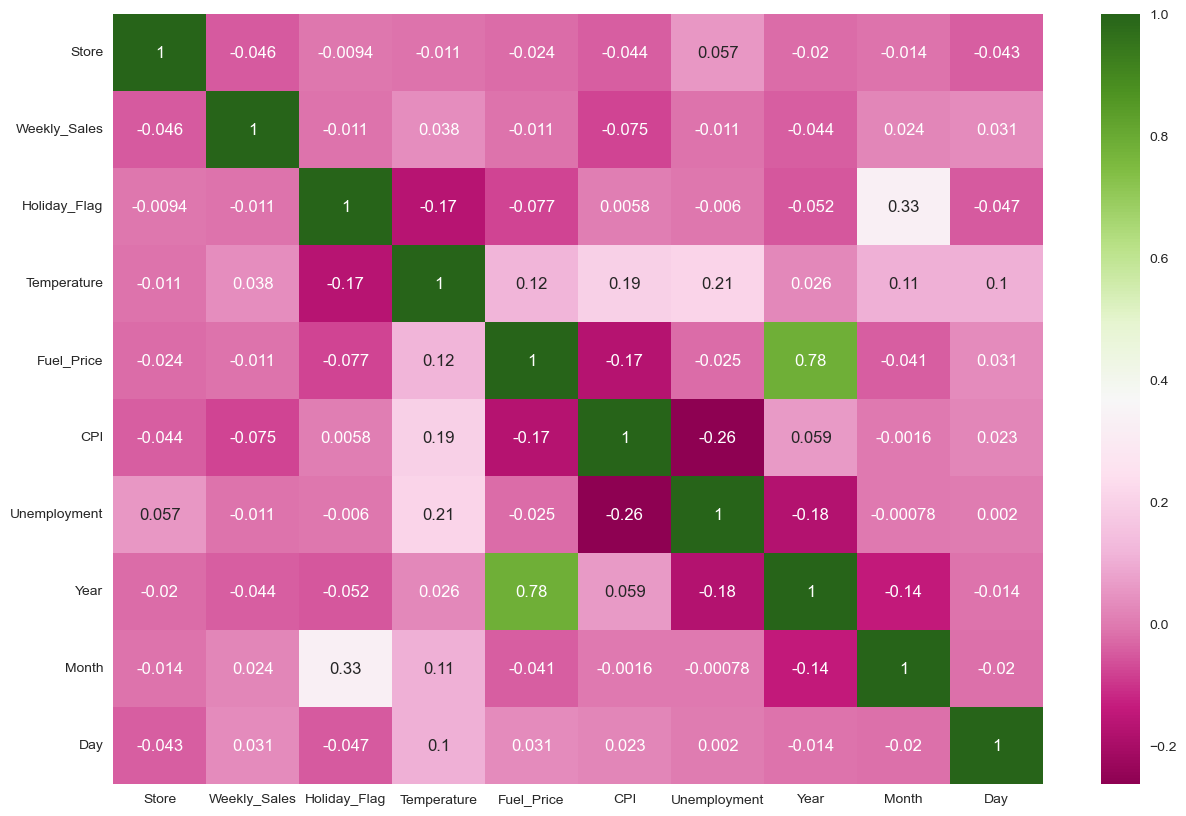

In [196]:
# correlation matrix for data without outliers
plt.figure(figsize=(15,10))
sns.heatmap(data_main_1.corr(),cmap='PiYG',annot=True)

In [197]:
del data_main_1['CPI']

In [198]:
del data_main_1['Year']

In [199]:
del data_main_1['Date']

<Axes: >

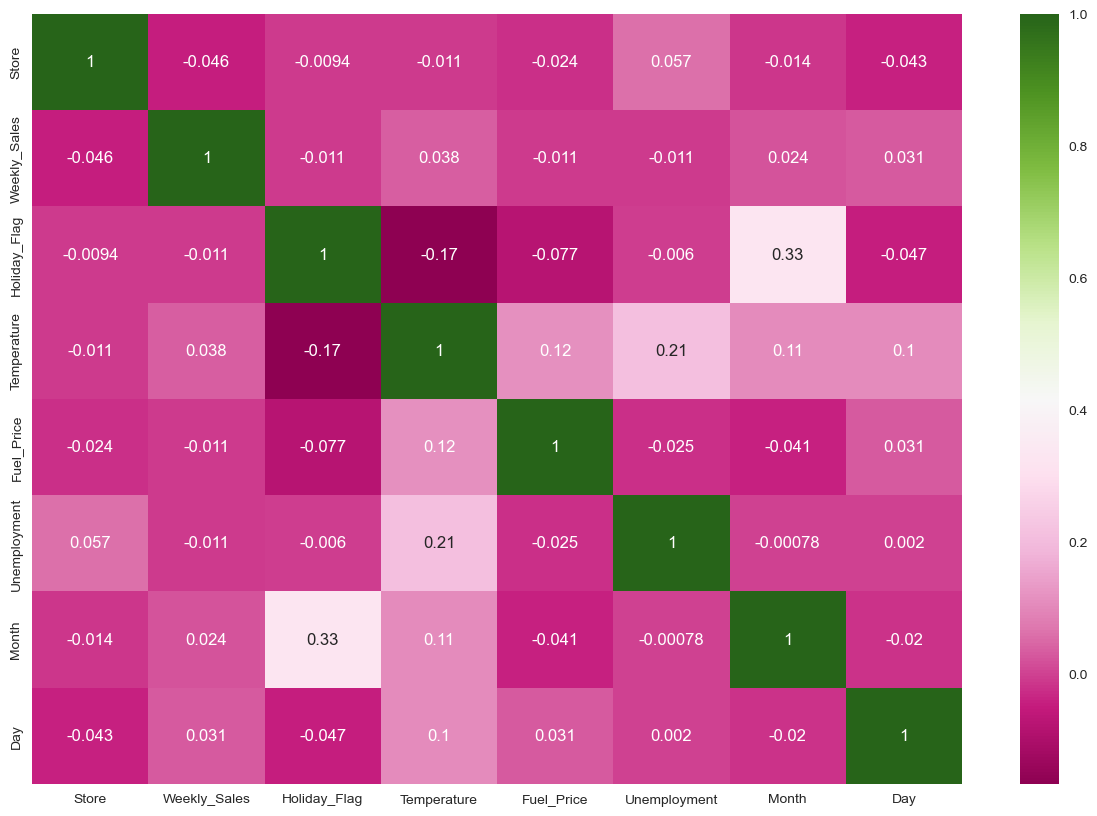

In [200]:
# correlation matrix for data without outliers
plt.figure(figsize=(15,10))
sns.heatmap(data_main_1.corr(),cmap='PiYG',annot=True)

In [201]:
setup(data_main_1,target='Weekly_Sales')
compare_models()

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=5674)

In [305]:
X=data_main_1.drop(columns='Weekly_Sales')
y=data_main_1['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train5,X_test5,y_train5,y_test5=train_test_split(X,y,test_size=0.2,random_state=42)

In [306]:
import lightgbm as lgb
lgbm=lgb.LGBMRegressor()
lgbm.fit(X_train5,y_train5)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 2573, number of used features: 7
[LightGBM] [Info] Start training from score 974279.730446


LGBMRegressor()

In [307]:
X_train_pred4=lgbm.predict(X_train5)

In [308]:
y_pred44=lgbm.predict(X_test5)

In [309]:
print('r2_score',r2_score(y_test5,y_pred44))
print("MSE Score: ", mean_squared_error(y_test5, y_pred44))
print("RMSE : ", sqrt(mean_squared_error(y_test5, y_pred44)))

r2_score 0.9497204958771289
MSE Score:  3203933466.533628
RMSE :  56603.29907817766


In [310]:
print('r2_score',r2_score(y_train5,X_train_pred4))
print("MSE Score: ", mean_squared_error(y_train5, X_train_pred4))
print("RMSE : ", sqrt(mean_squared_error(y_train5, X_train_pred4)))

r2_score 0.9703479615783185
MSE Score:  1942245983.1105812
RMSE :  44070.91992584885


In [311]:
# plotting the actual and predicted data
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=X_test5, y=y_test5, mode='lines', name='actual', line=dict(color='blue')))

# Plot the predicted values
fig.add_trace(go.Scatter(x=X_test5, y=y_pred44, mode='lines', name='predicted', line=dict(color='red')))


# Customize layout
fig.update_layout(title='Actual vs predicted Main data',
                  xaxis_title='data',
                  yaxis_title='Value(in millions)')

# Display the figure
fig.show()